<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Geometric_Algebra_Extraction_for_EE_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

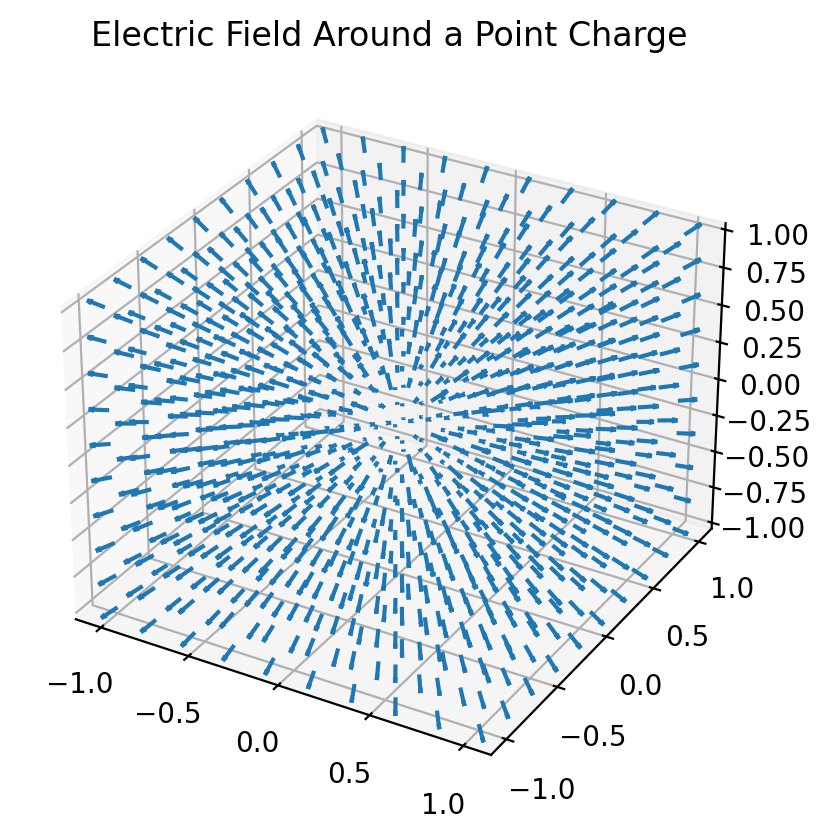

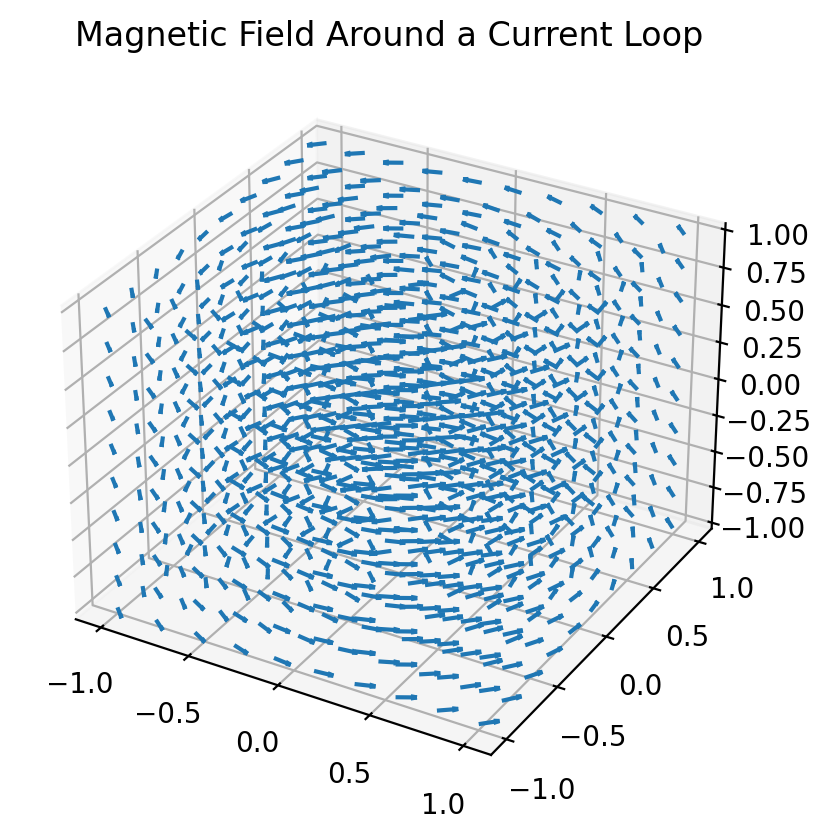

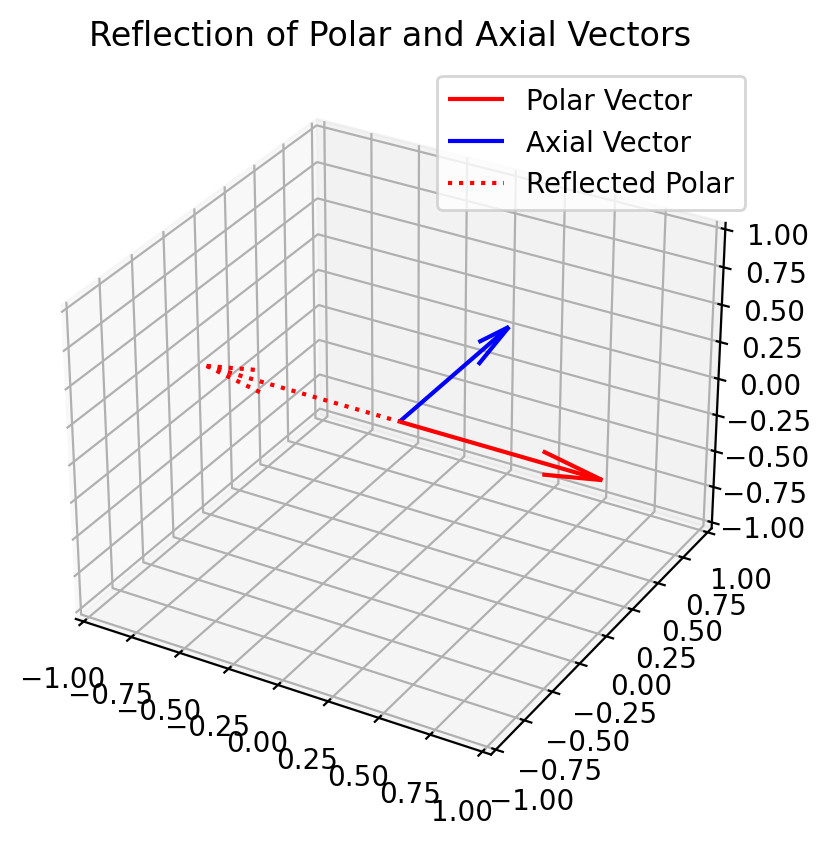

In [27]:
# Chapter 1: Maxwell's Equations and Vector Field Properties
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200


# Gauss's Law (Electric field visualization from a point charge)
def electric_field(point_charge, position):
    r_vec = position - point_charge["location"]
    r_mag = np.linalg.norm(r_vec)
    if r_mag == 0:
        return np.array([0.0, 0.0, 0.0])  # Avoid division by zero
    field = point_charge["charge"] * r_vec / (4 * np.pi * point_charge["epsilon"] * r_mag**3)
    return field

# Set up the charge and field grid
point_charge = {"location": np.array([0, 0, 0]), "charge": 1e-9, "epsilon": 8.854e-12}

x, y, z = np.linspace(-1, 1, 10), np.linspace(-1, 1, 10), np.linspace(-1, 1, 10)
X, Y, Z = np.meshgrid(x, y, z)
field = np.zeros(X.shape + (3,))

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        for k in range(X.shape[2]):
            position = np.array([X[i, j, k], Y[i, j, k], Z[i, j, k]])
            field[i, j, k] = electric_field(point_charge, position)

# Quiver plot for electric field
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, field[..., 0], field[..., 1], field[..., 2], length=0.1, normalize=True)
ax.set_title("Electric Field Around a Point Charge")
plt.show()

# Ampere's Law (Magnetic field around a current loop)
def magnetic_field(loop_radius, loop_center, position):
    # Approximation for a single loop using Biot-Savart Law
    mu_0 = 4 * np.pi * 1e-7
    I = 1  # Current in the loop
    r_vec = position - loop_center
    r_mag = np.linalg.norm(r_vec)
    if r_mag == 0:
        return np.array([0.0, 0.0, 0.0])  # Avoid division by zero
    field = (mu_0 * I * loop_radius**2) / (2 * (loop_radius**2 + r_mag**2)**(3/2)) * np.cross(np.array([0, 0, 1]), r_vec)
    return field

loop_radius = 0.5
loop_center = np.array([0, 0, 0])

field = np.zeros(X.shape + (3,))
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        for k in range(X.shape[2]):
            position = np.array([X[i, j, k], Y[i, j, k], Z[i, j, k]])
            field[i, j, k] = magnetic_field(loop_radius, loop_center, position)

# Quiver plot for magnetic field
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, field[..., 0], field[..., 1], field[..., 2], length=0.1, normalize=True)
ax.set_title("Magnetic Field Around a Current Loop")
plt.show()

# Polar vs Axial vectors (reflection symmetry)
def plot_reflection():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    polar = np.array([1, 0, 0])
    axial = np.array([0, 1, 0])

    ax.quiver(0, 0, 0, polar[0], polar[1], polar[2], color='r', label='Polar Vector')
    ax.quiver(0, 0, 0, axial[0], axial[1], axial[2], color='b', label='Axial Vector')

    # Reflection
    reflected_polar = -polar
    ax.quiver(0, 0, 0, reflected_polar[0], reflected_polar[1], reflected_polar[2], linestyle='dotted', color='r', label='Reflected Polar')

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.legend()
    ax.set_title("Reflection of Polar and Axial Vectors")
    plt.show()

plot_reflection()


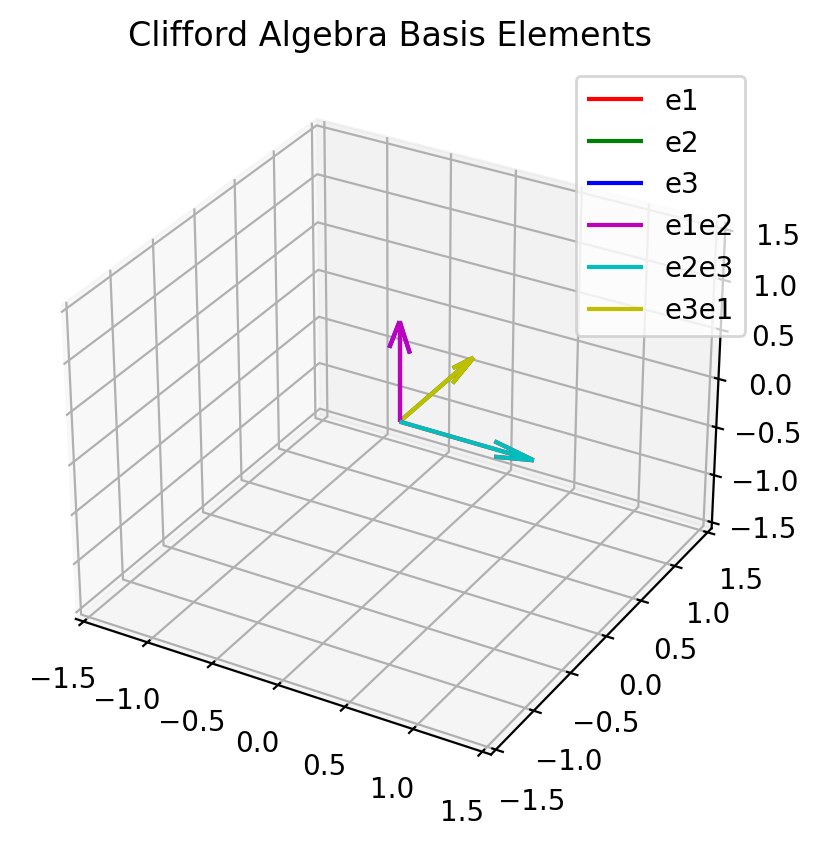

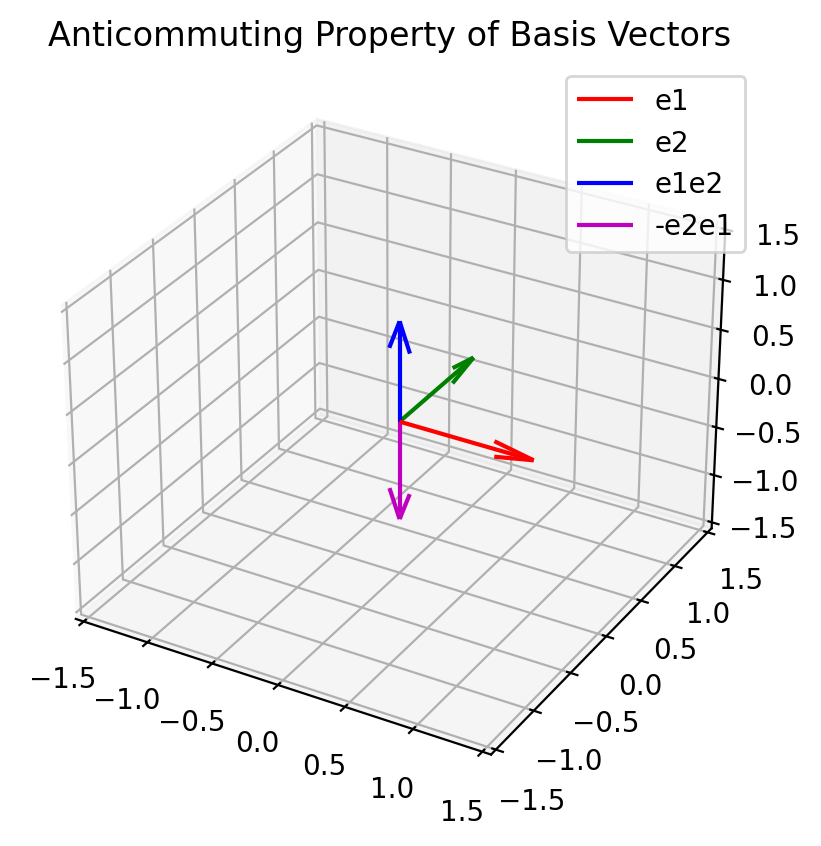

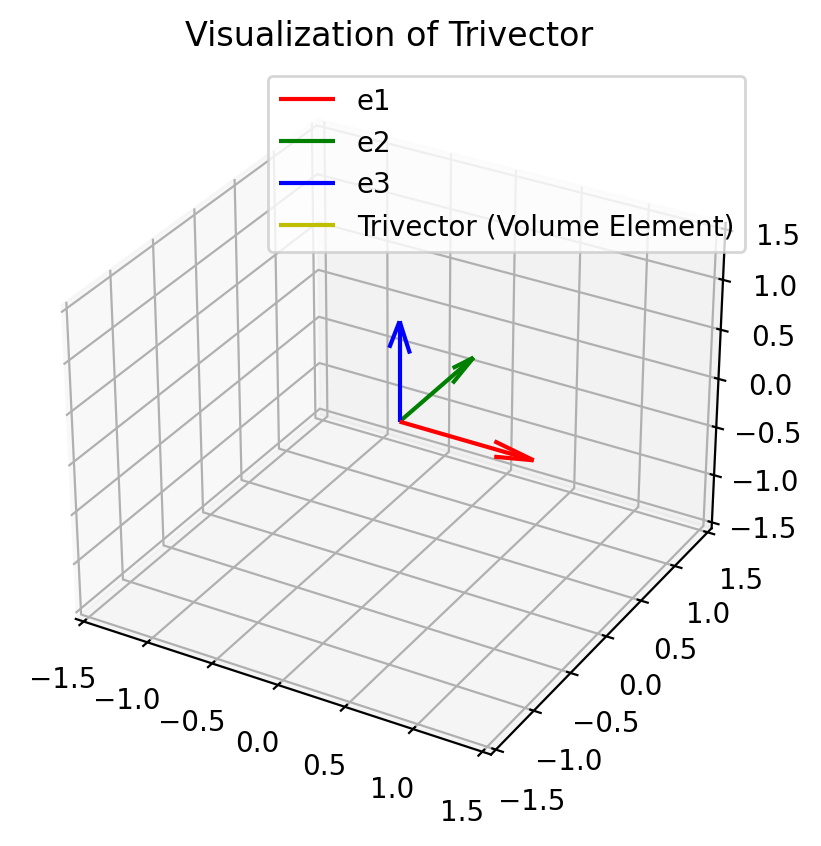

In [28]:
# Chapter 2: Definition of Clifford's Geometric Algebra
import numpy as np
import matplotlib.pyplot as plt

# Clifford's Algebra Basis Elements
def plot_clifford_basis():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Basis vectors
    e1 = np.array([1, 0, 0])
    e2 = np.array([0, 1, 0])
    e3 = np.array([0, 0, 1])

    # Plotting basis vectors
    ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='r', label='e1')
    ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='g', label='e2')
    ax.quiver(0, 0, 0, e3[0], e3[1], e3[2], color='b', label='e3')

    # Bivectors
    e1e2 = np.cross(e1, e2)
    e2e3 = np.cross(e2, e3)
    e3e1 = np.cross(e3, e1)

    # Plotting bivectors as planes
    ax.quiver(0, 0, 0, e1e2[0], e1e2[1], e1e2[2], color='m', label='e1e2')
    ax.quiver(0, 0, 0, e2e3[0], e2e3[1], e2e3[2], color='c', label='e2e3')
    ax.quiver(0, 0, 0, e3e1[0], e3e1[1], e3e1[2], color='y', label='e3e1')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Clifford Algebra Basis Elements")
    ax.legend()
    plt.show()

plot_clifford_basis()

# Visualization of the Anticommuting Property of Basis Vectors
def visualize_anticommutativity():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Basis vectors
    e1 = np.array([1, 0, 0])
    e2 = np.array([0, 1, 0])

    # Anticommuting property: e1 * e2 = -e2 * e1
    e1e2 = np.cross(e1, e2)  # e1 * e2
    e2e1 = -e1e2  # -e2 * e1

    # Plotting vectors and results
    ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='r', label='e1')
    ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='g', label='e2')
    ax.quiver(0, 0, 0, e1e2[0], e1e2[1], e1e2[2], color='b', label='e1e2')
    ax.quiver(0, 0, 0, e2e1[0], e2e1[1], e2e1[2], color='m', label='-e2e1')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Anticommuting Property of Basis Vectors")
    ax.legend()
    plt.show()

visualize_anticommutativity()

# Visualization of Trivector
# Trivector (e1 * e2 * e3)
def visualize_trivector():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Basis vectors
    e1 = np.array([1, 0, 0])
    e2 = np.array([0, 1, 0])
    e3 = np.array([0, 0, 1])

    # Trivector (volume element)
    trivector = np.cross(e1, np.cross(e2, e3))

    # Plotting
    ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='r', label='e1')
    ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='g', label='e2')
    ax.quiver(0, 0, 0, e3[0], e3[1], e3[2], color='b', label='e3')
    ax.quiver(0, 0, 0, trivector[0], trivector[1], trivector[2], color='y', label='Trivector (Volume Element)')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Visualization of Trivector")
    ax.legend()
    plt.show()

visualize_trivector()


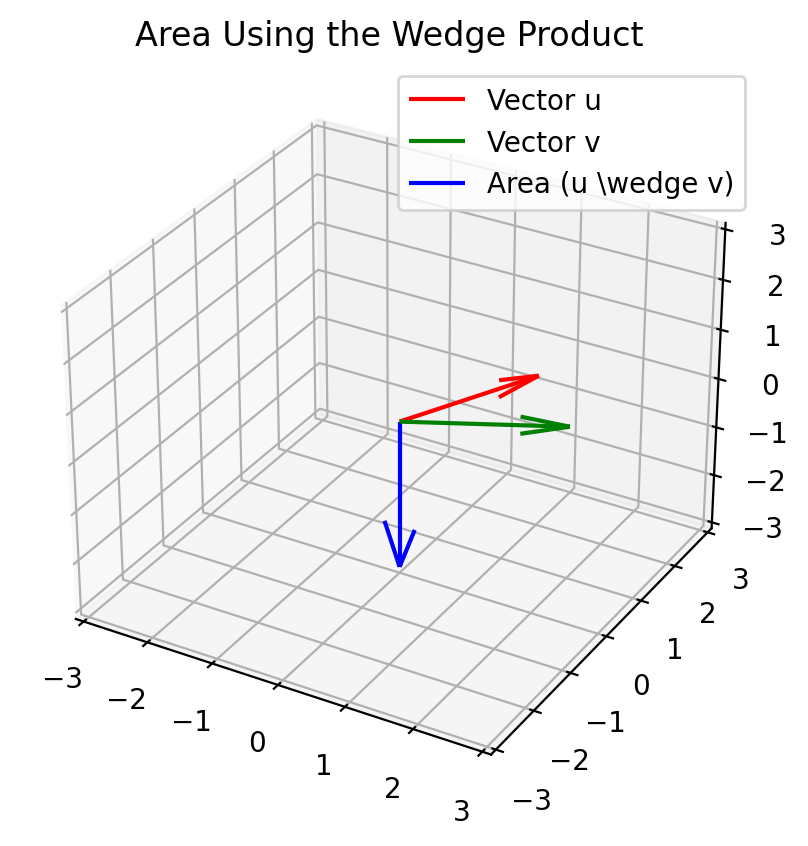

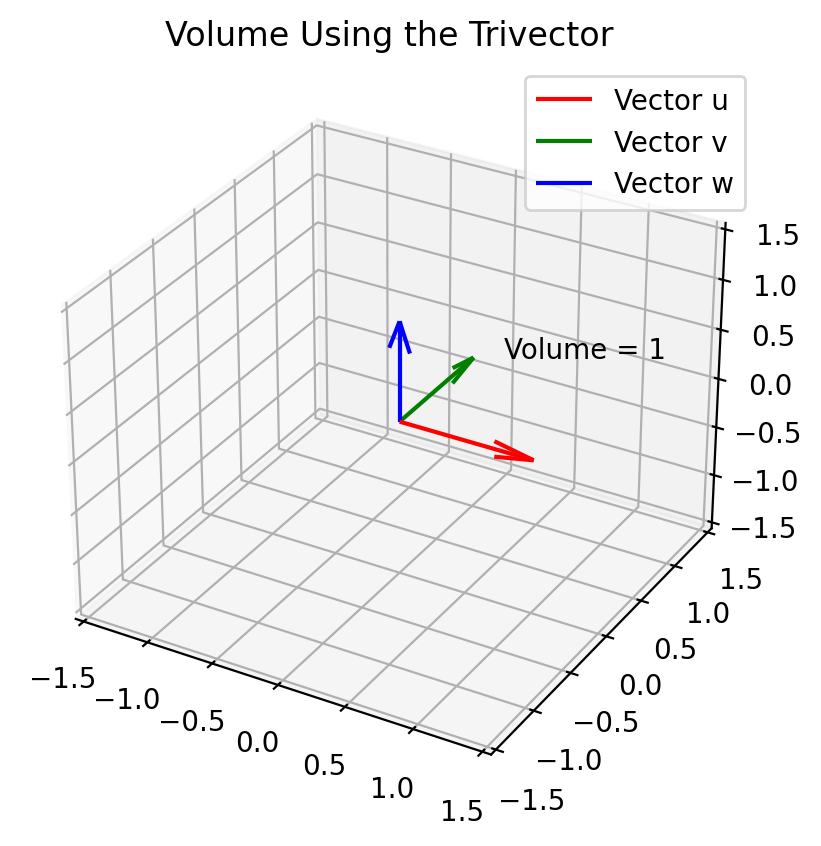

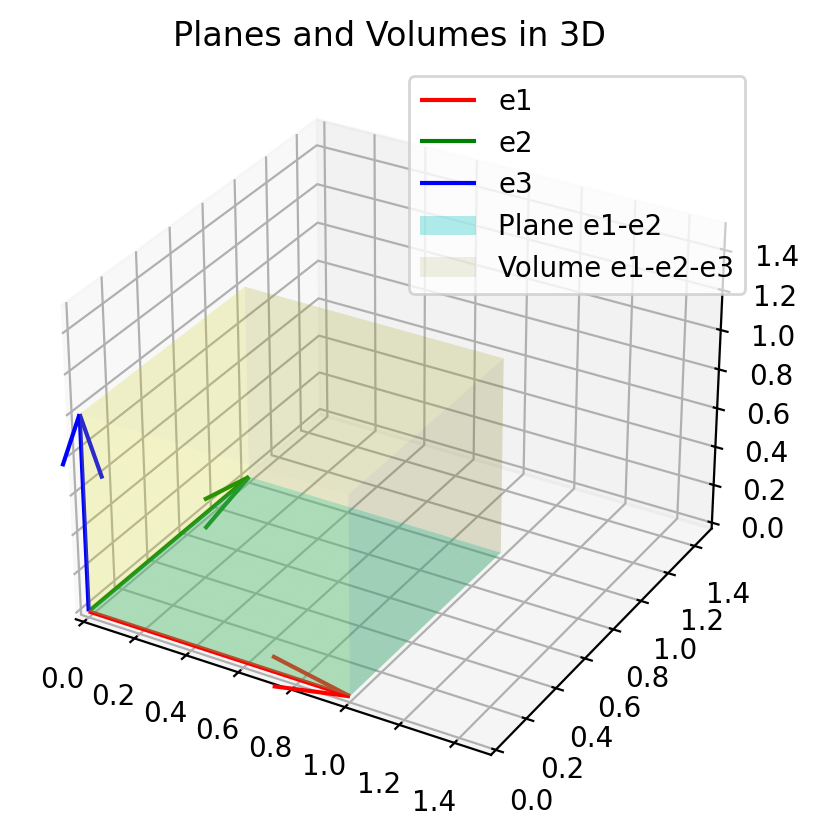

In [29]:
# Chapter 3: Areas and Volumes in Clifford's Geometric Algebra
import numpy as np
import matplotlib.pyplot as plt

# Calculation and Visualization of Area Using the Wedge Product
def plot_area_wedge_product():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define two vectors in 3D space
    u = np.array([1, 2, 0])
    v = np.array([2, 1, 0])

    # Compute the wedge product (area)
    area_vector = np.cross(u, v)  # Equivalent to the bivector in this context

    # Plot the vectors and the area
    ax.quiver(0, 0, 0, u[0], u[1], u[2], color='r', label='Vector u')
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='g', label='Vector v')
    ax.quiver(0, 0, 0, area_vector[0], area_vector[1], area_vector[2], color='b', label='Area (u \wedge v)')

    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    ax.set_title("Area Using the Wedge Product")
    ax.legend()
    plt.show()

plot_area_wedge_product()

# Calculation and Visualization of Volume Using the Trivector
def plot_volume_trivector():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define three vectors in 3D space
    u = np.array([1, 0, 0])
    v = np.array([0, 1, 0])
    w = np.array([0, 0, 1])

    # Compute the volume (scalar triple product)
    volume = np.dot(u, np.cross(v, w))

    # Plot the vectors
    ax.quiver(0, 0, 0, u[0], u[1], u[2], color='r', label='Vector u')
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='g', label='Vector v')
    ax.quiver(0, 0, 0, w[0], w[1], w[2], color='b', label='Vector w')

    ax.text(0.5, 0.5, 0.5, f"Volume = {volume}", color='k')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Volume Using the Trivector")
    ax.legend()
    plt.show()

plot_volume_trivector()

# General Visualization of Planes and Volumes in 3D
def visualize_planes_and_volumes():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define basis vectors
    e1 = np.array([1, 0, 0])
    e2 = np.array([0, 1, 0])
    e3 = np.array([0, 0, 1])

    # Plot basis vectors
    ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='r', label='e1')
    ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='g', label='e2')
    ax.quiver(0, 0, 0, e3[0], e3[1], e3[2], color='b', label='e3')

    # Plot a plane formed by e1 and e2
    x = np.linspace(0, 1, 10)
    y = np.linspace(0, 1, 10)
    X, Y = np.meshgrid(x, y)
    Z = 0 * X
    ax.plot_surface(X, Y, Z, alpha=0.3, color='cyan', label='Plane e1-e2')

    # Plot volume (cube) formed by e1, e2, e3
    ax.bar3d([0], [0], [0], [1], [1], [1], alpha=0.1, color='yellow', label='Volume e1-e2-e3')

    ax.set_xlim([0, 1.5])
    ax.set_ylim([0, 1.5])
    ax.set_zlim([0, 1.5])
    ax.set_title("Planes and Volumes in 3D")
    ax.legend()
    plt.show()

visualize_planes_and_volumes()


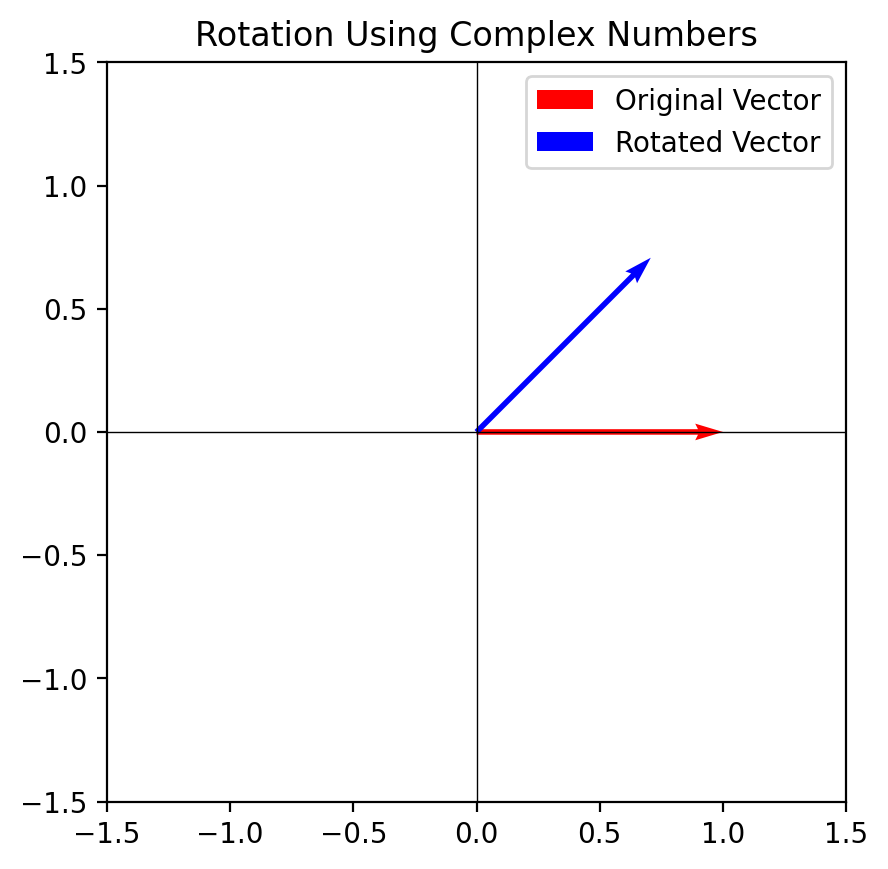

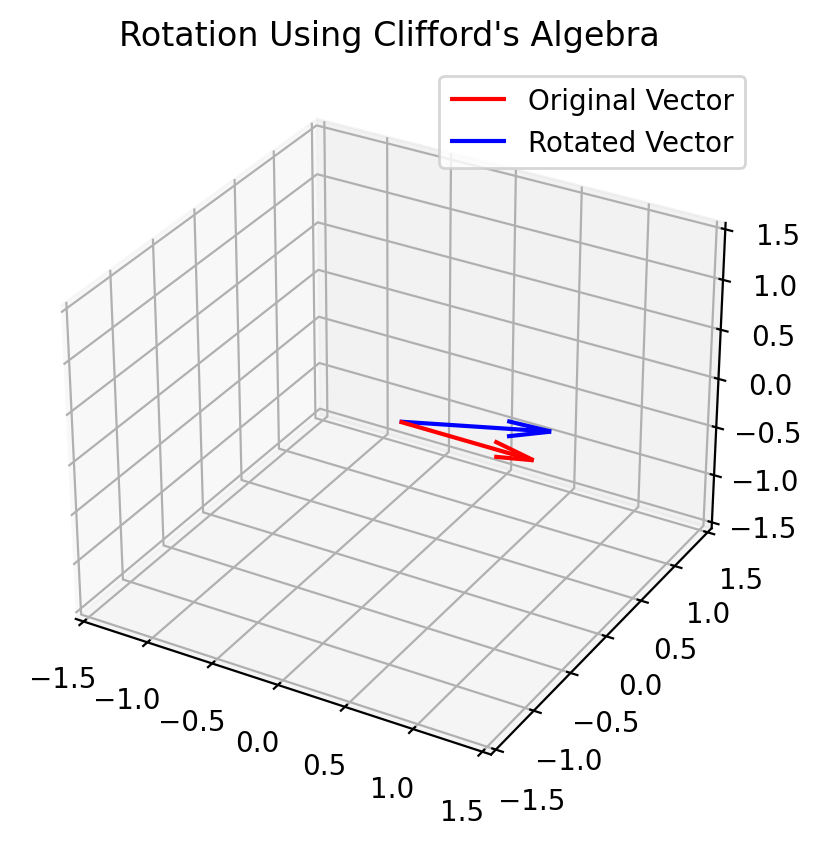

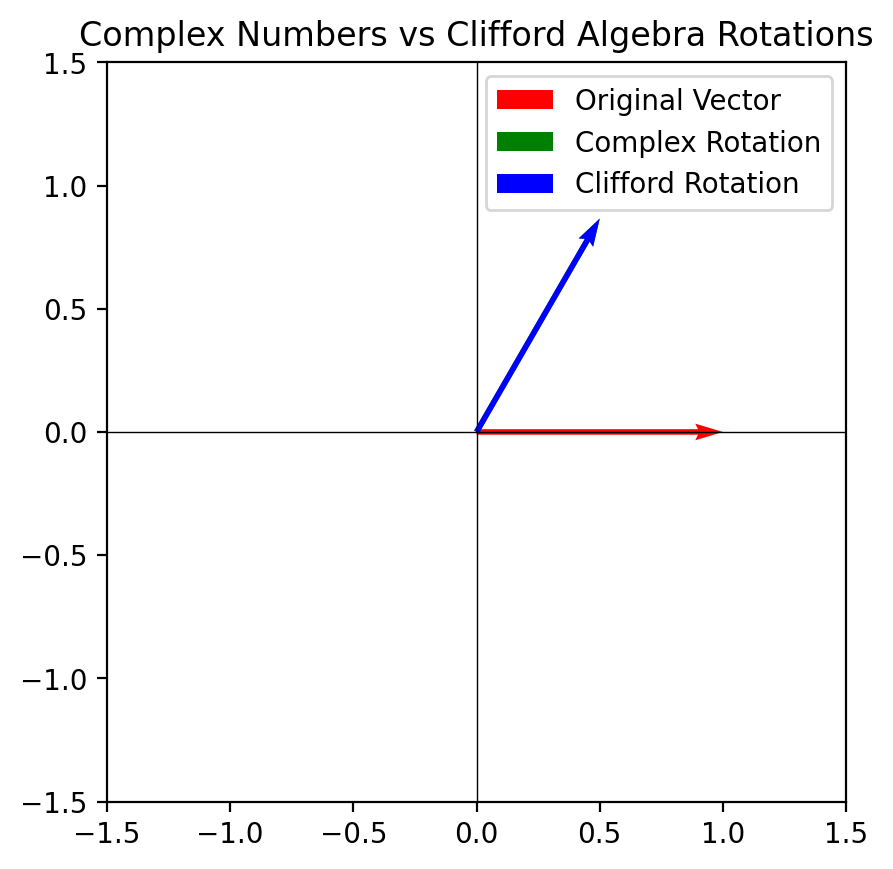

In [30]:
# Chapter 4: Generalizing Complex Numbers to Include Cartesian Vectors
import numpy as np
import matplotlib.pyplot as plt

# Visualization of Complex Numbers as Rotations in 2D
def plot_complex_rotation():
    fig, ax = plt.subplots()

    # Define a vector in 2D
    vector = np.array([1, 0])
    angle = np.pi / 4  # Rotate by 45 degrees

    # Rotation matrix using complex number properties
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                 [np.sin(angle), np.cos(angle)]])

    rotated_vector = rotation_matrix @ vector

    # Plot the original and rotated vectors
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')
    ax.quiver(0, 0, rotated_vector[0], rotated_vector[1], angles='xy', scale_units='xy', scale=1, color='b', label='Rotated Vector')

    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_title("Rotation Using Complex Numbers")
    ax.legend()
    plt.show()

plot_complex_rotation()

# Rotation of Cartesian Vectors Using Clifford's Algebra
def plot_clifford_rotation():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define a vector in 3D
    vector = np.array([1, 0, 0])
    angle = np.pi / 4  # Rotate by 45 degrees

    # Rotation axis
    rotation_axis = np.array([0, 0, 1])
    rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)  # Normalize

    # Rotation using the Clifford algebra equivalent of complex numbers
    cos_theta = np.cos(angle / 2)
    sin_theta = np.sin(angle / 2)
    bivector = sin_theta * rotation_axis

    # Quaternion-like rotation
    rotated_vector = vector * cos_theta + np.cross(bivector, vector)

    # Plot the original and rotated vectors
    ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color='r', label='Original Vector')
    ax.quiver(0, 0, 0, rotated_vector[0], rotated_vector[1], rotated_vector[2], color='b', label='Rotated Vector')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Rotation Using Clifford's Algebra")
    ax.legend()
    plt.show()

plot_clifford_rotation()

# Demonstrating the Relationship Between Complex Numbers and Clifford Algebra
def plot_complex_vs_clifford():
    fig, ax = plt.subplots()

    # Define a vector in 2D
    vector = np.array([1, 0])
    angle = np.pi / 3  # Rotate by 60 degrees

    # Rotation using complex numbers
    complex_rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                         [np.sin(angle), np.cos(angle)]])
    rotated_complex = complex_rotation_matrix @ vector

    # Rotation using Clifford algebra
    rotated_clifford = complex_rotation_matrix @ vector  # Same in this case for 2D

    # Plot the results
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')
    ax.quiver(0, 0, rotated_complex[0], rotated_complex[1], angles='xy', scale_units='xy', scale=1, color='g', label='Complex Rotation')
    ax.quiver(0, 0, rotated_clifford[0], rotated_clifford[1], angles='xy', scale_units='xy', scale=1, color='b', label='Clifford Rotation')

    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_title("Complex Numbers vs Clifford Algebra Rotations")
    ax.legend()
    plt.show()

plot_complex_vs_clifford()


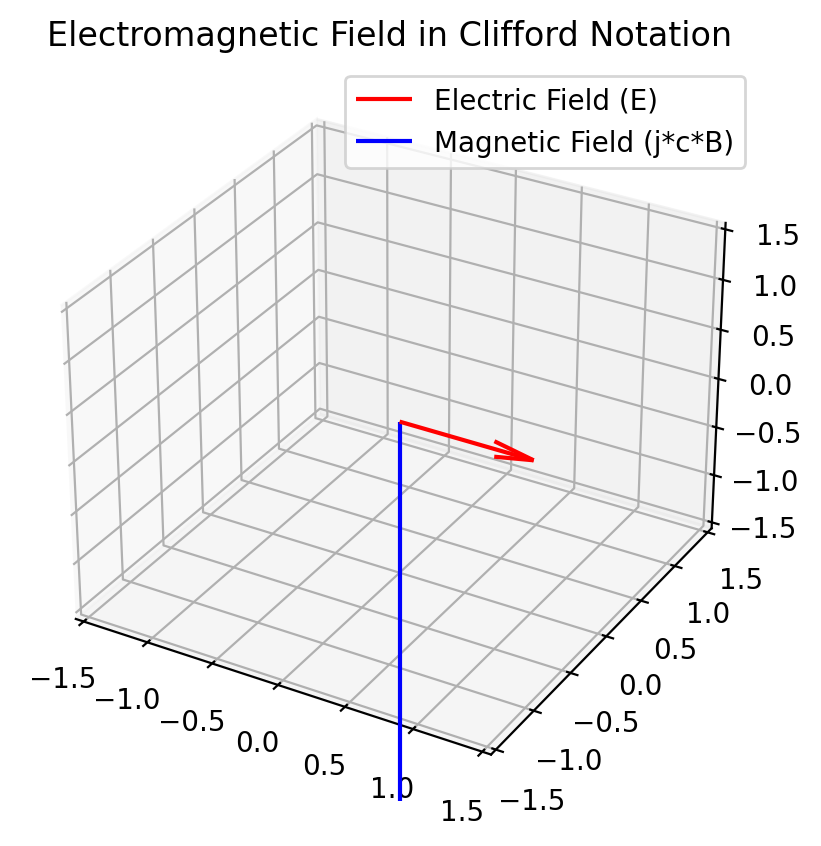

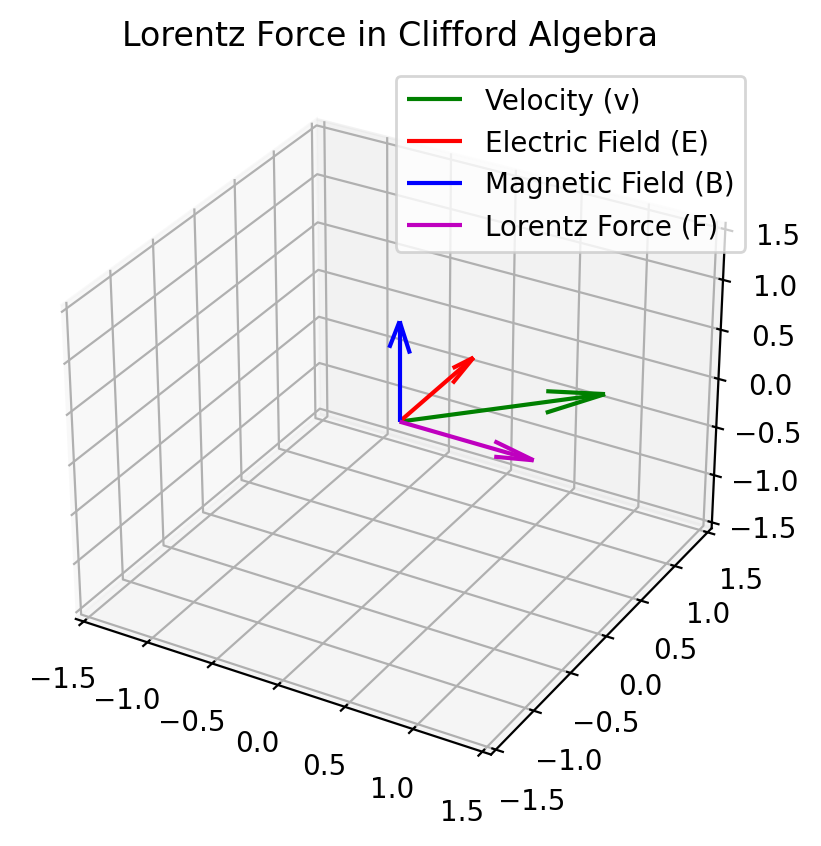

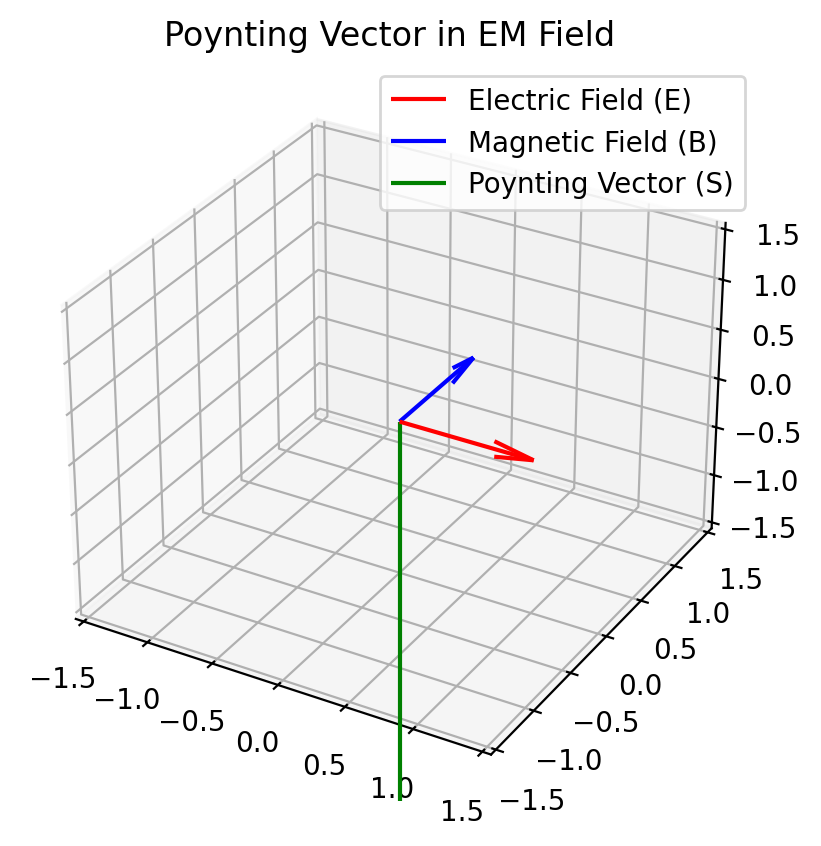

In [31]:
# Chapter 5: Electromagnetism in Clifford Notation
import numpy as np
import matplotlib.pyplot as plt

# Visualization of Electromagnetic Field Components
# F = E + j*c*B (Electric field + Magnetic field in Clifford notation)
def plot_electromagnetic_field():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define electric field (polar vector)
    E = np.array([1, 0, 0])  # Along x-axis

    # Define magnetic field (bivector in Clifford notation)
    B = np.array([0, 0, 1])  # Along z-axis

    # Plot electric field
    ax.quiver(0, 0, 0, E[0], E[1], E[2], color='r', label='Electric Field (E)')

    # Plot magnetic field as a bivector (scaled by speed of light)
    c = 3e8  # Speed of light in m/s
    B_scaled = c * B
    ax.quiver(0, 0, 0, B_scaled[0], B_scaled[1], B_scaled[2], color='b', label='Magnetic Field (j*c*B)')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Electromagnetic Field in Clifford Notation")
    ax.legend()
    plt.show()

plot_electromagnetic_field()

# Lorentz Force Visualization in Clifford Algebra
def plot_lorentz_force():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define velocity vector (v)
    v = np.array([1, 1, 0])  # In x-y plane

    # Define electric field (E)
    E = np.array([0, 1, 0])  # Along y-axis

    # Define magnetic field (B)
    B = np.array([0, 0, 1])  # Along z-axis

    # Compute Lorentz force: F = q(E + v x B)
    q = 1  # Unit charge
    force = q * (E + np.cross(v, B))

    # Plot vectors
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='g', label='Velocity (v)')
    ax.quiver(0, 0, 0, E[0], E[1], E[2], color='r', label='Electric Field (E)')
    ax.quiver(0, 0, 0, B[0], B[1], B[2], color='b', label='Magnetic Field (B)')
    ax.quiver(0, 0, 0, force[0], force[1], force[2], color='m', label='Lorentz Force (F)')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Lorentz Force in Clifford Algebra")
    ax.legend()
    plt.show()

plot_lorentz_force()

# Poynting Vector Visualization
# S = (1/mu_0) * (j * B) ^ E (Energy flow in an EM field)
def plot_poynting_vector():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define electric field (E)
    E = np.array([1, 0, 0])  # Along x-axis

    # Define magnetic field (B)
    B = np.array([0, 1, 0])  # Along y-axis

    # Compute Poynting vector S
    mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
    S = (1 / mu_0) * np.cross(B, E)

    # Plot vectors
    ax.quiver(0, 0, 0, E[0], E[1], E[2], color='r', label='Electric Field (E)')
    ax.quiver(0, 0, 0, B[0], B[1], B[2], color='b', label='Magnetic Field (B)')
    ax.quiver(0, 0, 0, S[0], S[1], S[2], color='g', label='Poynting Vector (S)')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Poynting Vector in EM Field")
    ax.legend()
    plt.show()

plot_poynting_vector()


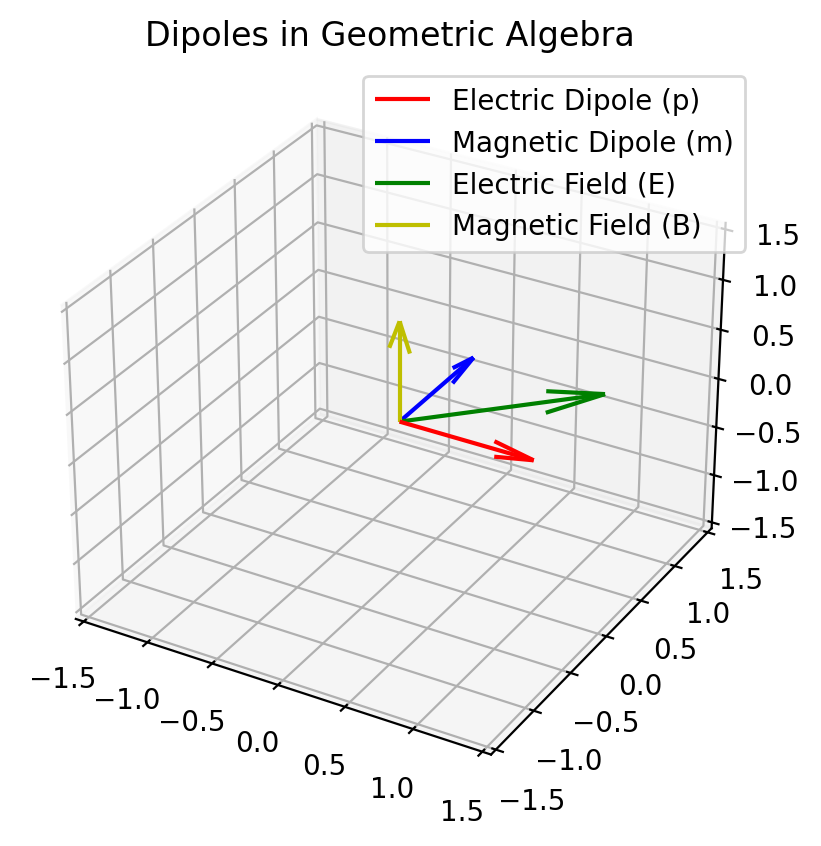

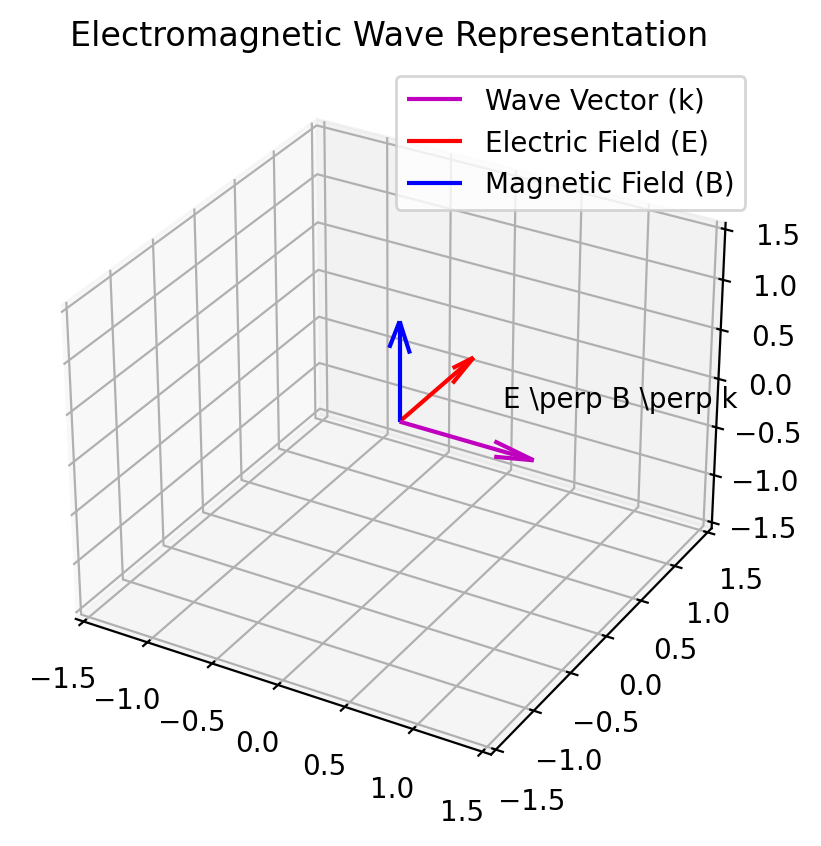

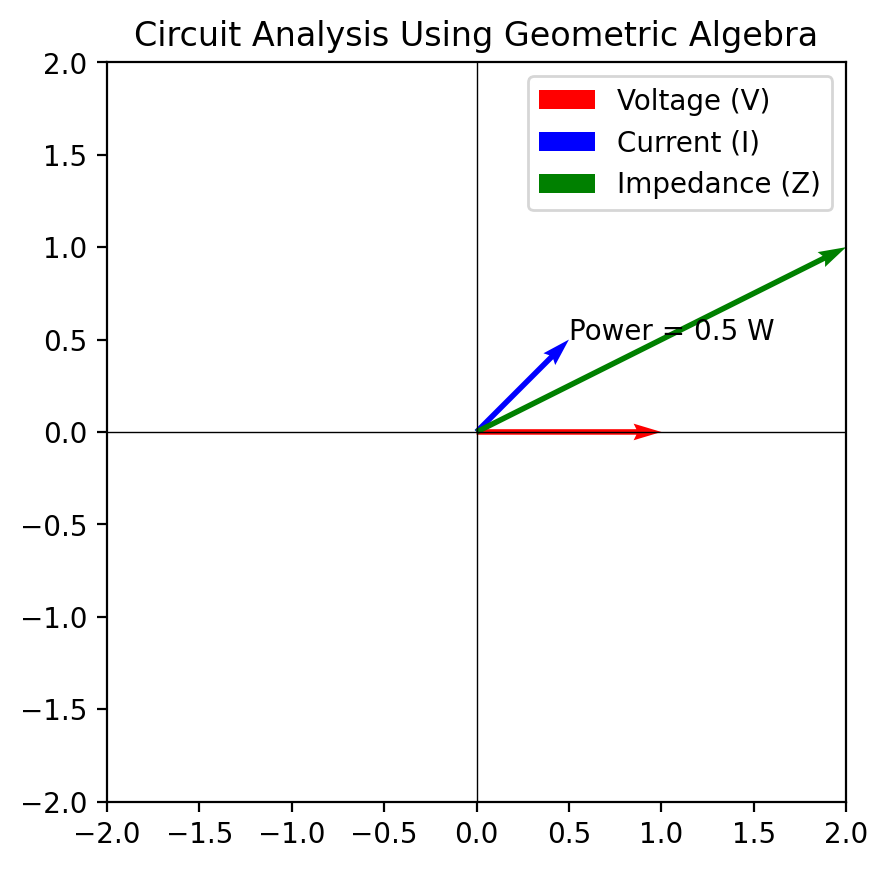

In [32]:
# Chapter 6: Applications of Geometric Algebra to Electromagnetism
import numpy as np
import matplotlib.pyplot as plt

# Dipoles in Geometric Algebra
def plot_dipoles():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define electric dipole moment (p)
    p = np.array([1, 0, 0])  # Along x-axis

    # Define magnetic dipole moment (m)
    m = np.array([0, 1, 0])  # Along y-axis

    # Electric field at a point (arbitrary example)
    E = np.array([1, 1, 0])

    # Magnetic field at a point (arbitrary example)
    B = np.array([0, 0, 1])

    # Plot dipoles and fields
    ax.quiver(0, 0, 0, p[0], p[1], p[2], color='r', label='Electric Dipole (p)')
    ax.quiver(0, 0, 0, m[0], m[1], m[2], color='b', label='Magnetic Dipole (m)')
    ax.quiver(0, 0, 0, E[0], E[1], E[2], color='g', label='Electric Field (E)')
    ax.quiver(0, 0, 0, B[0], B[1], B[2], color='y', label='Magnetic Field (B)')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Dipoles in Geometric Algebra")
    ax.legend()
    plt.show()

plot_dipoles()

# Electromagnetic Wave Representation
def plot_em_wave():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define wave vector (k)
    k = np.array([1, 0, 0])  # Along x-axis

    # Electric field (E)
    E = np.array([0, 1, 0])  # Along y-axis

    # Magnetic field (B)
    B = np.array([0, 0, 1])  # Along z-axis

    # Plot wave components
    ax.quiver(0, 0, 0, k[0], k[1], k[2], color='m', label='Wave Vector (k)')
    ax.quiver(0, 0, 0, E[0], E[1], E[2], color='r', label='Electric Field (E)')
    ax.quiver(0, 0, 0, B[0], B[1], B[2], color='b', label='Magnetic Field (B)')

    # Add orthogonality labels
    ax.text(0.5, 0.5, 0, "E \perp B \perp k", color='black')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Electromagnetic Wave Representation")
    ax.legend()
    plt.show()

plot_em_wave()

# Circuit Analysis Using Geometric Algebra
def plot_circuit_analysis():
    fig, ax = plt.subplots()

    # Define phasors (arbitrary example)
    V = np.array([1, 0])  # Voltage
    I = np.array([0.5, 0.5])  # Current

    # Impedance vector (R = 2 Ohms, L = j1 Ohm)
    Z = np.array([2, 1])

    # Compute power (V * I)
    power = np.dot(V, I)

    # Plot phasors and impedance
    ax.quiver(0, 0, V[0], V[1], angles='xy', scale_units='xy', scale=1, color='r', label='Voltage (V)')
    ax.quiver(0, 0, I[0], I[1], angles='xy', scale_units='xy', scale=1, color='b', label='Current (I)')
    ax.quiver(0, 0, Z[0], Z[1], angles='xy', scale_units='xy', scale=1, color='g', label='Impedance (Z)')

    ax.text(0.5, 0.5, f"Power = {power} W", color='black')

    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_title("Circuit Analysis Using Geometric Algebra")
    ax.legend()
    plt.show()

plot_circuit_analysis()


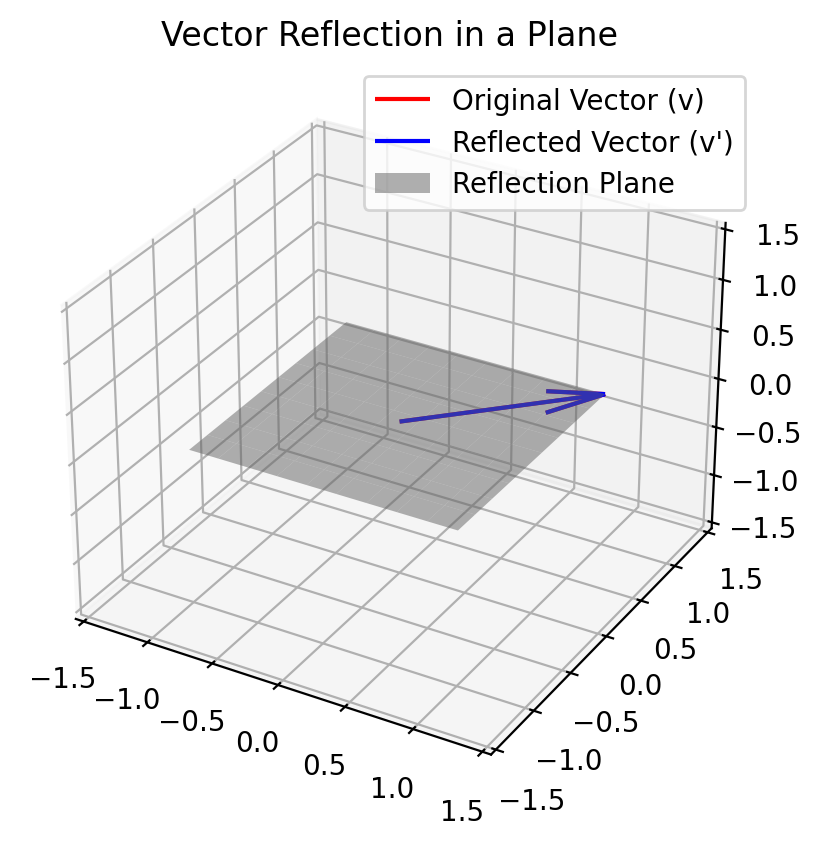

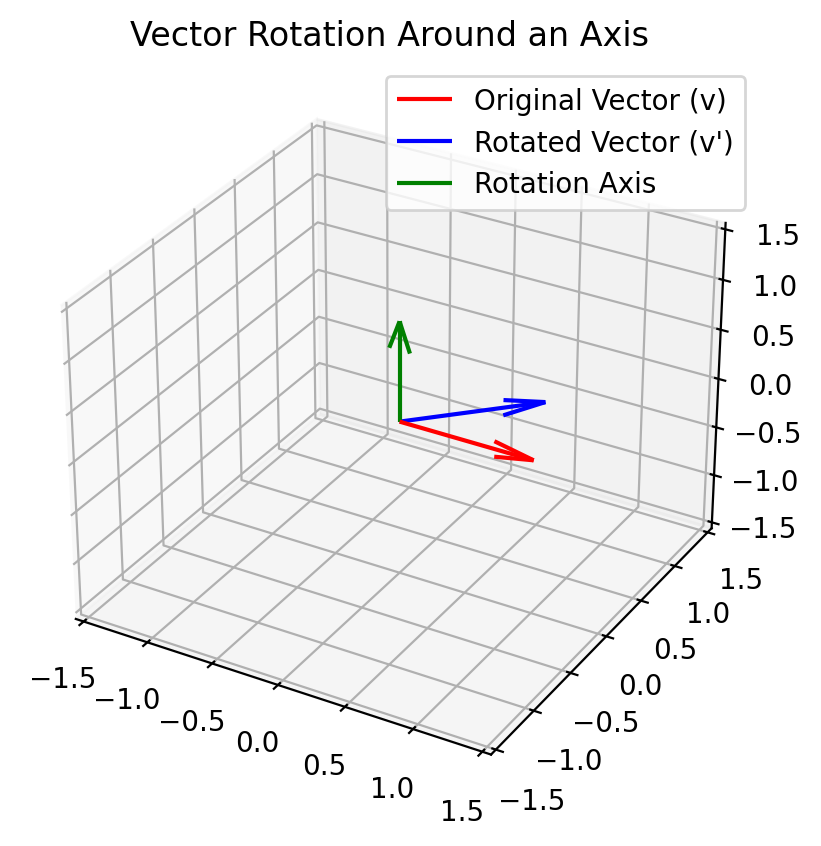

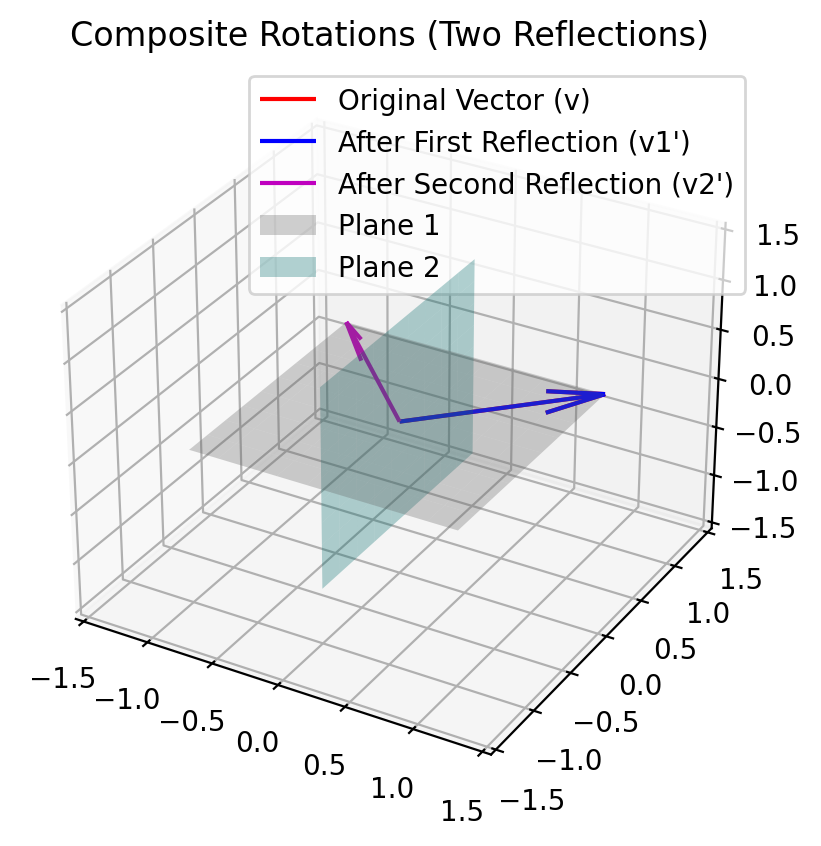

In [33]:
# Chapter 7: Reflections and Rotations in Geometric Algebra
import numpy as np
import matplotlib.pyplot as plt

# Reflection of a Vector in a Plane
def plot_vector_reflection():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the vector to reflect
    v = np.array([1, 1, 0])  # Example vector

    # Define the normal to the reflection plane
    n = np.array([0, 0, 1])  # Plane normal (z-axis)

    # Normalize the normal vector
    n = n / np.linalg.norm(n)

    # Compute the reflected vector: v' = v - 2*(v . n)*n
    reflected_v = v - 2 * np.dot(v, n) * n

    # Plot original and reflected vectors
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='r', label="Original Vector (v)")
    ax.quiver(0, 0, 0, reflected_v[0], reflected_v[1], reflected_v[2], color='b', label="Reflected Vector (v')")

    # Plot the reflection plane
    x = np.linspace(-1, 1, 10)
    y = np.linspace(-1, 1, 10)
    X, Y = np.meshgrid(x, y)
    Z = 0 * X  # Plane at z=0
    ax.plot_surface(X, Y, Z, alpha=0.5, color='gray', label='Reflection Plane')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Vector Reflection in a Plane")
    ax.legend()
    plt.show()

plot_vector_reflection()

# Rotation of a Vector Around an Axis
def plot_vector_rotation():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the vector to rotate
    v = np.array([1, 0, 0])  # Example vector along x-axis

    # Define the rotation axis
    axis = np.array([0, 0, 1])  # Rotate around z-axis

    # Normalize the rotation axis
    axis = axis / np.linalg.norm(axis)

    # Define the rotation angle
    theta = np.pi / 4  # 45 degrees

    # Compute the rotated vector using Rodrigues' rotation formula
    v_rot = (v * np.cos(theta) +
             np.cross(axis, v) * np.sin(theta) +
             axis * np.dot(axis, v) * (1 - np.cos(theta)))

    # Plot original and rotated vectors
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='r', label="Original Vector (v)")
    ax.quiver(0, 0, 0, v_rot[0], v_rot[1], v_rot[2], color='b', label="Rotated Vector (v')")

    # Plot the rotation axis
    ax.quiver(0, 0, 0, axis[0], axis[1], axis[2], color='g', label='Rotation Axis')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Vector Rotation Around an Axis")
    ax.legend()
    plt.show()

plot_vector_rotation()

# Composite Rotations (Two Reflections)
def plot_composite_rotations():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the vector to reflect
    v = np.array([1, 1, 0])  # Example vector

    # Define two planes for reflection
    n1 = np.array([0, 0, 1])  # Normal to first plane (z-axis)
    n2 = np.array([1, 0, 0])  # Normal to second plane (x-axis)

    # Normalize the normal vectors
    n1 = n1 / np.linalg.norm(n1)
    n2 = n2 / np.linalg.norm(n2)

    # First reflection
    reflected_v1 = v - 2 * np.dot(v, n1) * n1

    # Second reflection
    reflected_v2 = reflected_v1 - 2 * np.dot(reflected_v1, n2) * n2

    # Plot original, intermediate, and final vectors
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='r', label="Original Vector (v)")
    ax.quiver(0, 0, 0, reflected_v1[0], reflected_v1[1], reflected_v1[2], color='b', label="After First Reflection (v1')")
    ax.quiver(0, 0, 0, reflected_v2[0], reflected_v2[1], reflected_v2[2], color='m', label="After Second Reflection (v2')")

    # Plot the reflection planes
    x = np.linspace(-1, 1, 10)
    y = np.linspace(-1, 1, 10)
    X, Y = np.meshgrid(x, y)

    # Plane 1
    Z1 = 0 * X  # Plane at z=0
    ax.plot_surface(X, Y, Z1, alpha=0.3, color='gray', label='Plane 1')

    # Plane 2
    Z2 = np.linspace(-1, 1, 10)
    Y2, Z2 = np.meshgrid(y, Z2)
    X2 = 0 * Y2  # Plane at x=0
    ax.plot_surface(X2, Y2, Z2, alpha=0.3, color='cyan', label='Plane 2')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Composite Rotations (Two Reflections)")
    ax.legend()
    plt.show()

plot_composite_rotations()


<ipython-input-34-47f76bc67a61>:17: RuntimeWarning: invalid value encountered in sqrt
  Y_pos = np.sqrt(T**2 - X**2)
<ipython-input-34-47f76bc67a61>:18: RuntimeWarning: invalid value encountered in sqrt
  Y_neg = -np.sqrt(T**2 - X**2)


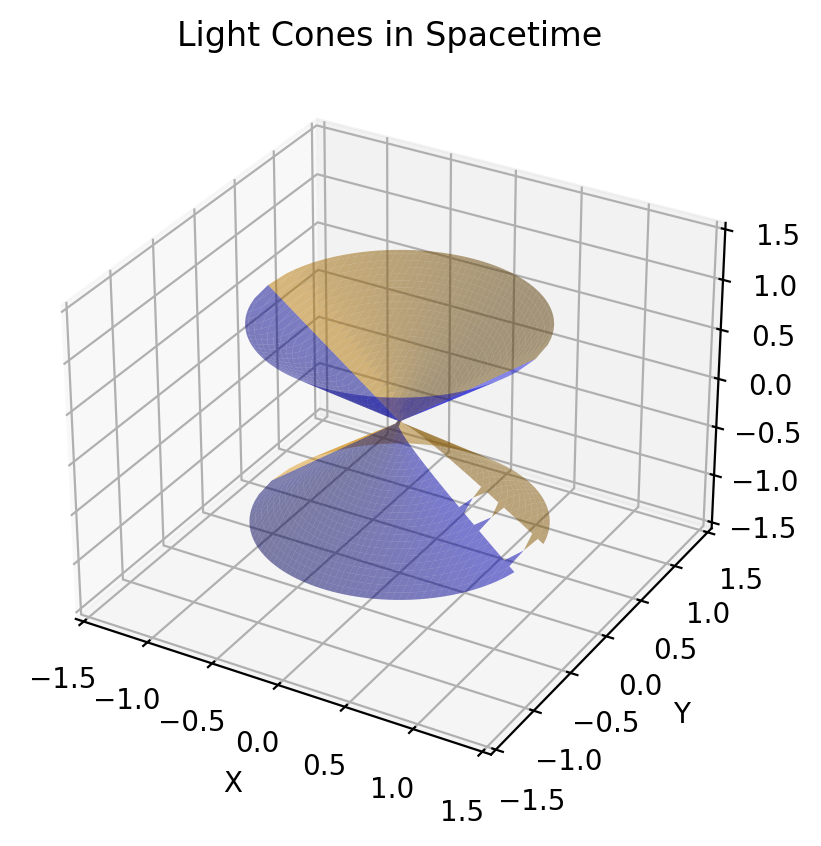

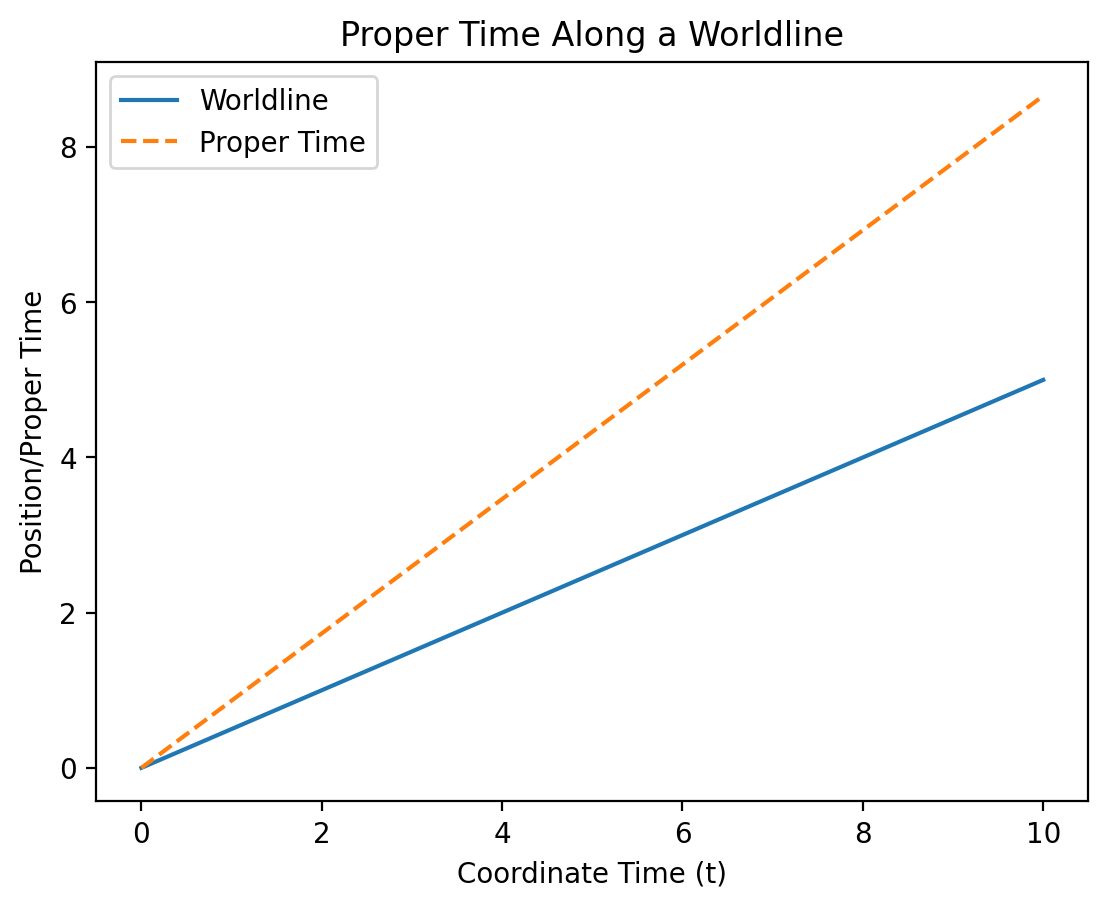

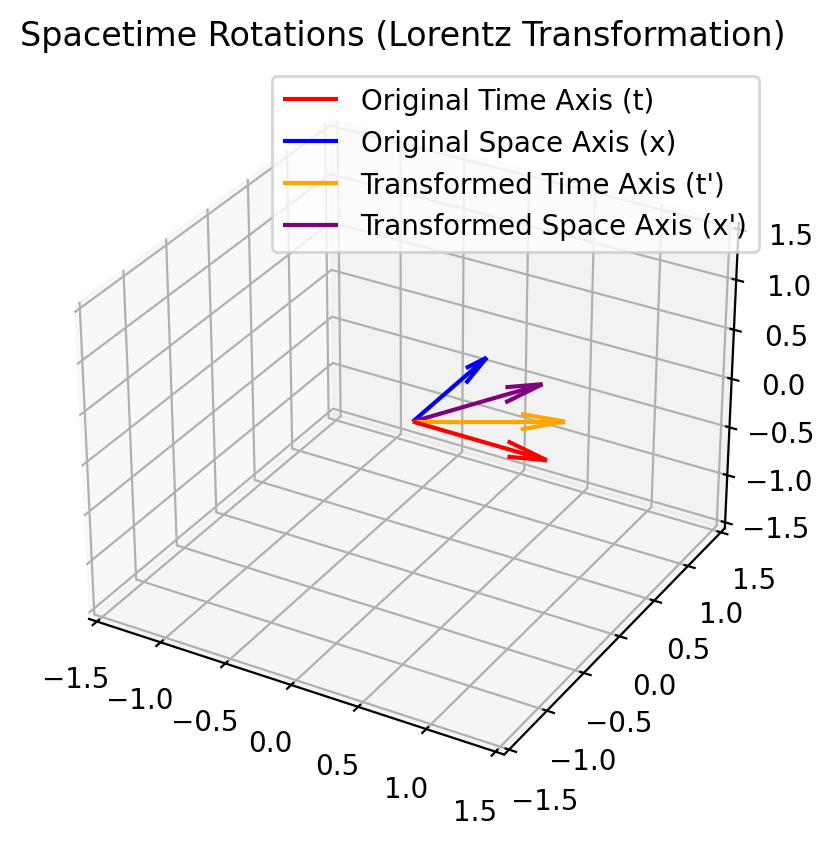

In [34]:
# Chapter 8: Geometric Algebra in Relativity
import numpy as np
import matplotlib.pyplot as plt

# Light Cones in Spacetime
def plot_light_cone():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the range for spacetime coordinates
    t = np.linspace(-1, 1, 100)
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    T, X = np.meshgrid(t, x)

    # Light cone: t^2 = x^2 + y^2
    Y_pos = np.sqrt(T**2 - X**2)
    Y_neg = -np.sqrt(T**2 - X**2)

    # Plot the upper and lower parts of the cone
    ax.plot_surface(X, Y_pos, T, alpha=0.5, color='orange', label='Future Light Cone')
    ax.plot_surface(X, Y_neg, T, alpha=0.5, color='blue', label='Past Light Cone')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("T")
    ax.set_title("Light Cones in Spacetime")
    plt.show()

plot_light_cone()

# Proper Time Representation
def plot_proper_time():
    fig, ax = plt.subplots()

    # Define the worldline (arbitrary example)
    t = np.linspace(0, 10, 100)
    x = 0.5 * t  # Object moving at half the speed of light

    # Proper time tau
    c = 1  # Speed of light (normalized)
    tau = np.sqrt(t**2 - (x/c)**2)

    # Plot the worldline and proper time
    ax.plot(t, x, label='Worldline')
    ax.plot(t, tau, label='Proper Time', linestyle='dashed')

    ax.set_xlabel("Coordinate Time (t)")
    ax.set_ylabel("Position/Proper Time")
    ax.set_title("Proper Time Along a Worldline")
    ax.legend()
    plt.show()

plot_proper_time()

# Relativity and Rotations in Spacetime
def plot_spacetime_rotation():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define basis vectors in spacetime
    t = np.array([1, 0, 0])  # Time axis
    x = np.array([0, 1, 0])  # Space axis

    # Lorentz transformation (rotation in spacetime)
    theta = np.pi / 6  # Example angle
    gamma = np.cos(theta)
    beta = np.sin(theta)

    # Transformed basis vectors
    t_prime = gamma * t + beta * x
    x_prime = gamma * x + beta * t

    # Plot original and transformed basis vectors
    ax.quiver(0, 0, 0, t[0], t[1], t[2], color='r', label='Original Time Axis (t)')
    ax.quiver(0, 0, 0, x[0], x[1], x[2], color='b', label='Original Space Axis (x)')
    ax.quiver(0, 0, 0, t_prime[0], t_prime[1], t_prime[2], color='orange', label="Transformed Time Axis (t')")
    ax.quiver(0, 0, 0, x_prime[0], x_prime[1], x_prime[2], color='purple', label="Transformed Space Axis (x')")

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Spacetime Rotations (Lorentz Transformation)")
    ax.legend()
    plt.show()

plot_spacetime_rotation()


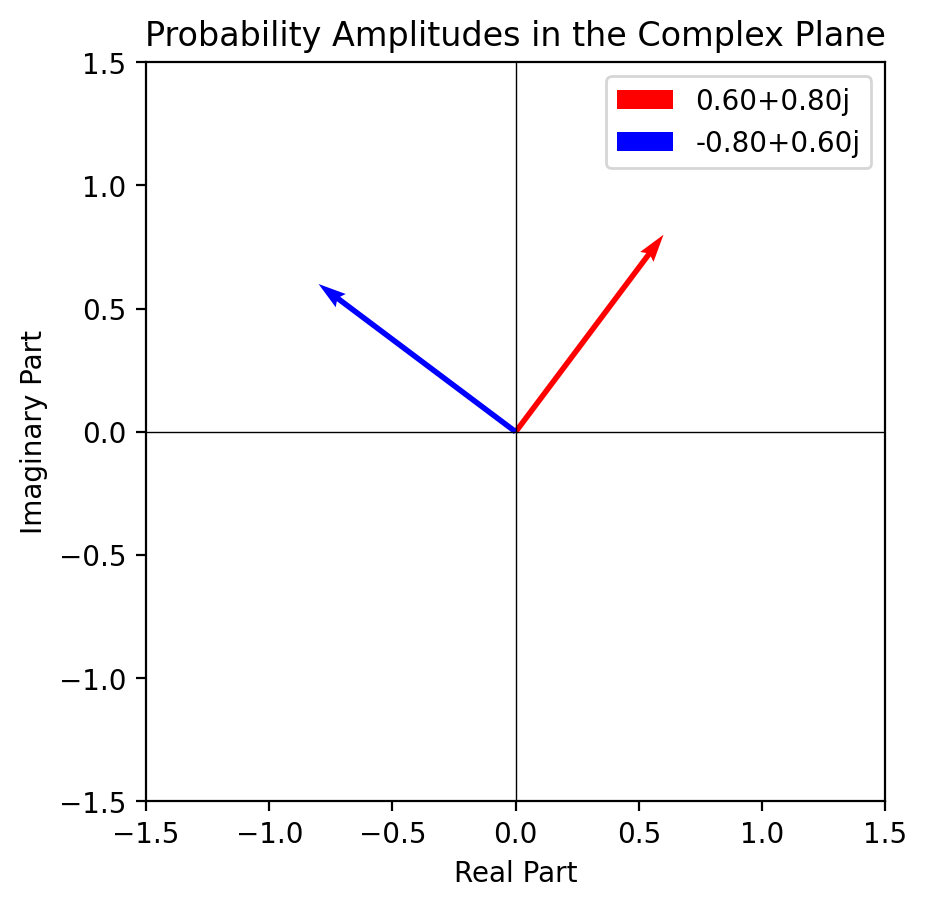

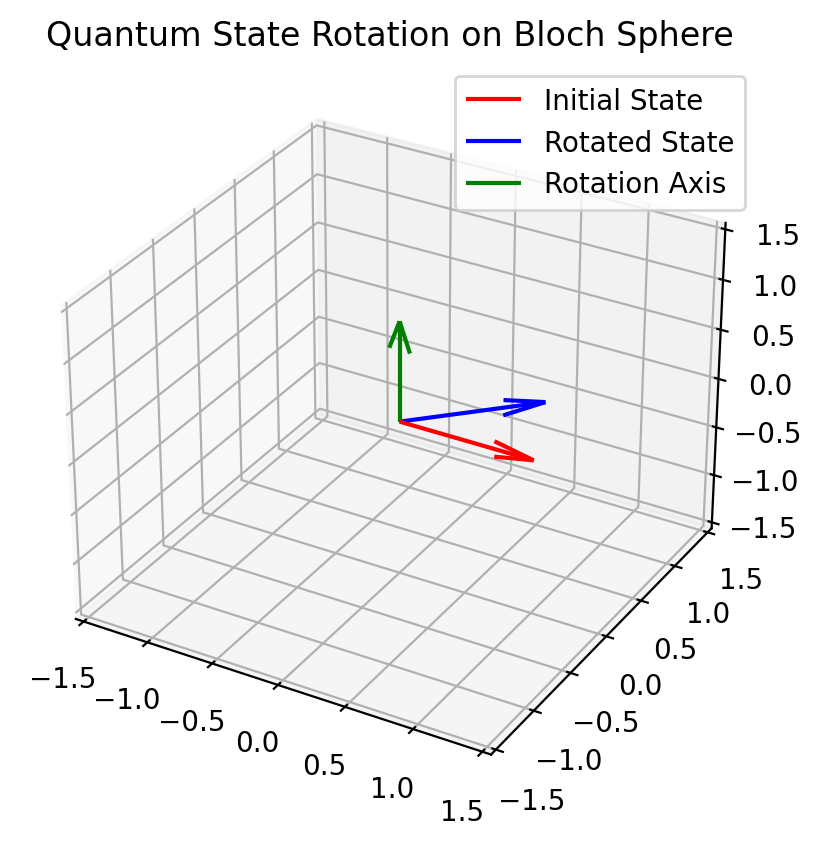

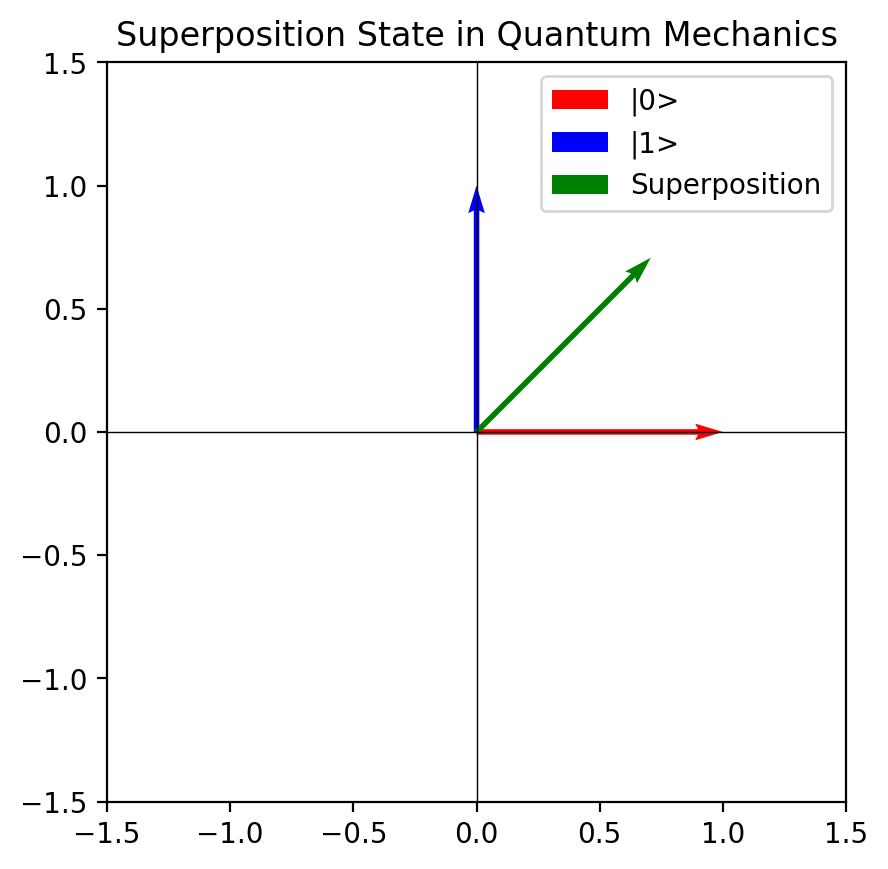

In [35]:
# Chapter 9: Geometric Algebra in Quantum Mechanics
import numpy as np
import matplotlib.pyplot as plt

# Probability Amplitude Visualization (Complex Plane)
def plot_probability_amplitude():
    fig, ax = plt.subplots()

    # Define probability amplitude (example complex numbers)
    amplitudes = [0.6 + 0.8j, -0.8 + 0.6j]
    colors = ['r', 'b']

    # Plot complex numbers in the complex plane
    for amp, color in zip(amplitudes, colors):
        ax.quiver(0, 0, amp.real, amp.imag, angles='xy', scale_units='xy', scale=1, color=color, label=f'{amp:.2f}')

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel("Real Part")
    ax.set_ylabel("Imaginary Part")
    ax.set_title("Probability Amplitudes in the Complex Plane")
    ax.legend()
    plt.show()

plot_probability_amplitude()

# Quantum State Rotation Visualization
def plot_quantum_state_rotation():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the initial quantum state (Bloch sphere representation)
    state = np.array([1, 0, 0])  # Initial state along x-axis

    # Rotation axis (z-axis for this example)
    axis = np.array([0, 0, 1])

    # Define the rotation angle
    theta = np.pi / 4  # 45 degrees

    # Compute rotated state using Rodrigues' rotation formula
    rotated_state = (state * np.cos(theta) +
                     np.cross(axis, state) * np.sin(theta) +
                     axis * np.dot(axis, state) * (1 - np.cos(theta)))

    # Plot initial and rotated states
    ax.quiver(0, 0, 0, state[0], state[1], state[2], color='r', label='Initial State')
    ax.quiver(0, 0, 0, rotated_state[0], rotated_state[1], rotated_state[2], color='b', label='Rotated State')

    # Plot rotation axis
    ax.quiver(0, 0, 0, axis[0], axis[1], axis[2], color='g', label='Rotation Axis')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Quantum State Rotation on Bloch Sphere")
    ax.legend()
    plt.show()

plot_quantum_state_rotation()

# Superposition State Visualization
def plot_superposition_state():
    fig, ax = plt.subplots()

    # Define basis states (|0> and |1>)
    basis_states = [np.array([1, 0]), np.array([0, 1])]

    # Define superposition state
    alpha, beta = 1 / np.sqrt(2), 1 / np.sqrt(2)
    superposition_state = alpha * basis_states[0] + beta * basis_states[1]

    # Plot basis states and superposition
    ax.quiver(0, 0, basis_states[0][0], basis_states[0][1], angles='xy', scale_units='xy', scale=1, color='r', label='|0>')
    ax.quiver(0, 0, basis_states[1][0], basis_states[1][1], angles='xy', scale_units='xy', scale=1, color='b', label='|1>')
    ax.quiver(0, 0, superposition_state[0], superposition_state[1], angles='xy', scale_units='xy', scale=1, color='g', label='Superposition')

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_aspect('equal', adjustable='box')
    ax.set_title("Superposition State in Quantum Mechanics")
    ax.legend()
    plt.show()

plot_superposition_state()

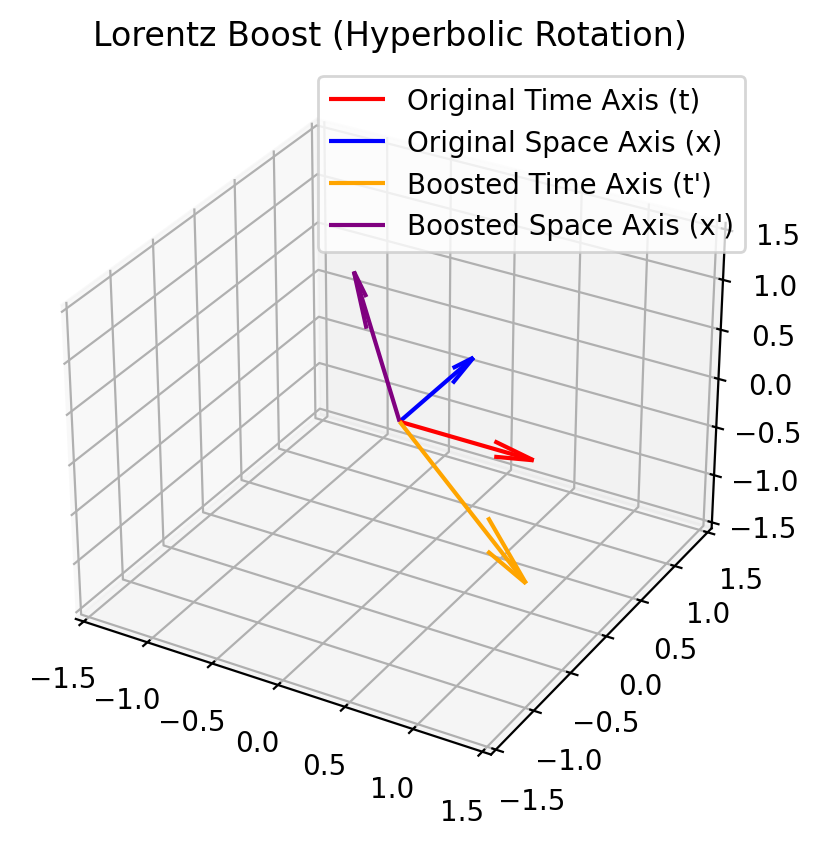

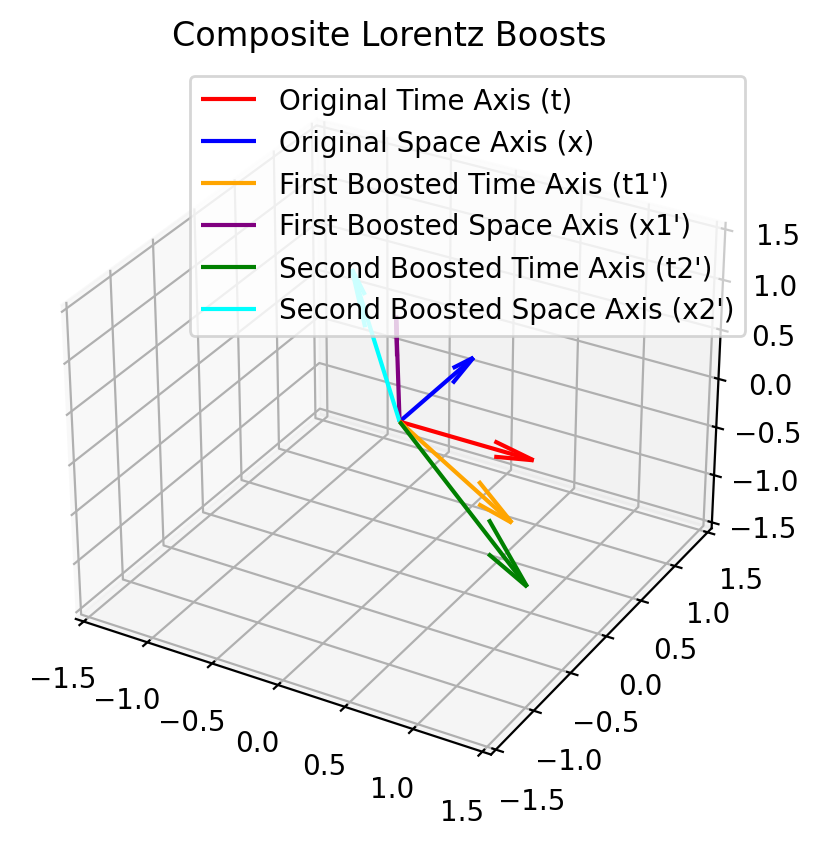

In [36]:
# Chapter 10: The Lorentz Group in Geometric Algebra
import numpy as np
import matplotlib.pyplot as plt

# Lorentz Boost Visualization (Hyperbolic Rotation)
def plot_lorentz_boost():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define spacetime basis vectors (t and x)
    t = np.array([1, 0, 0])  # Time axis
    x = np.array([0, 1, 0])  # Space axis

    # Lorentz boost parameters
    beta = 0.8  # Velocity as a fraction of c
    gamma = 1 / np.sqrt(1 - beta**2)  # Lorentz factor

    # Boosted basis vectors
    t_prime = gamma * t - gamma * beta * x
    x_prime = -gamma * beta * t + gamma * x

    # Plot original and boosted basis vectors
    ax.quiver(0, 0, 0, t[0], t[1], t[2], color='r', label='Original Time Axis (t)')
    ax.quiver(0, 0, 0, x[0], x[1], x[2], color='b', label='Original Space Axis (x)')
    ax.quiver(0, 0, 0, t_prime[0], t_prime[1], t_prime[2], color='orange', label="Boosted Time Axis (t')")
    ax.quiver(0, 0, 0, x_prime[0], x_prime[1], x_prime[2], color='purple', label="Boosted Space Axis (x')")

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Lorentz Boost (Hyperbolic Rotation)")
    ax.legend()
    plt.show()

plot_lorentz_boost()

# Composition of Lorentz Boosts
def plot_composite_lorentz_boosts():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define spacetime basis vectors (t and x)
    t = np.array([1, 0, 0])  # Time axis
    x = np.array([0, 1, 0])  # Space axis

    # First boost parameters
    beta1 = 0.6
    gamma1 = 1 / np.sqrt(1 - beta1**2)

    # Second boost parameters
    beta2 = 0.4
    gamma2 = 1 / np.sqrt(1 - beta2**2)

    # Perform first boost
    t_prime1 = gamma1 * t - gamma1 * beta1 * x
    x_prime1 = -gamma1 * beta1 * t + gamma1 * x

    # Perform second boost on already-boosted vectors
    t_prime2 = gamma2 * t_prime1 - gamma2 * beta2 * x_prime1
    x_prime2 = -gamma2 * beta2 * t_prime1 + gamma2 * x_prime1

    # Plot original, first boosted, and second boosted vectors
    ax.quiver(0, 0, 0, t[0], t[1], t[2], color='r', label='Original Time Axis (t)')
    ax.quiver(0, 0, 0, x[0], x[1], x[2], color='b', label='Original Space Axis (x)')
    ax.quiver(0, 0, 0, t_prime1[0], t_prime1[1], t_prime1[2], color='orange', label="First Boosted Time Axis (t1')")
    ax.quiver(0, 0, 0, x_prime1[0], x_prime1[1], x_prime1[2], color='purple', label="First Boosted Space Axis (x1')")
    ax.quiver(0, 0, 0, t_prime2[0], t_prime2[1], t_prime2[2], color='green', label="Second Boosted Time Axis (t2')")
    ax.quiver(0, 0, 0, x_prime2[0], x_prime2[1], x_prime2[2], color='cyan', label="Second Boosted Space Axis (x2')")

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Composite Lorentz Boosts")
    ax.legend()
    plt.show()

plot_composite_lorentz_boosts()


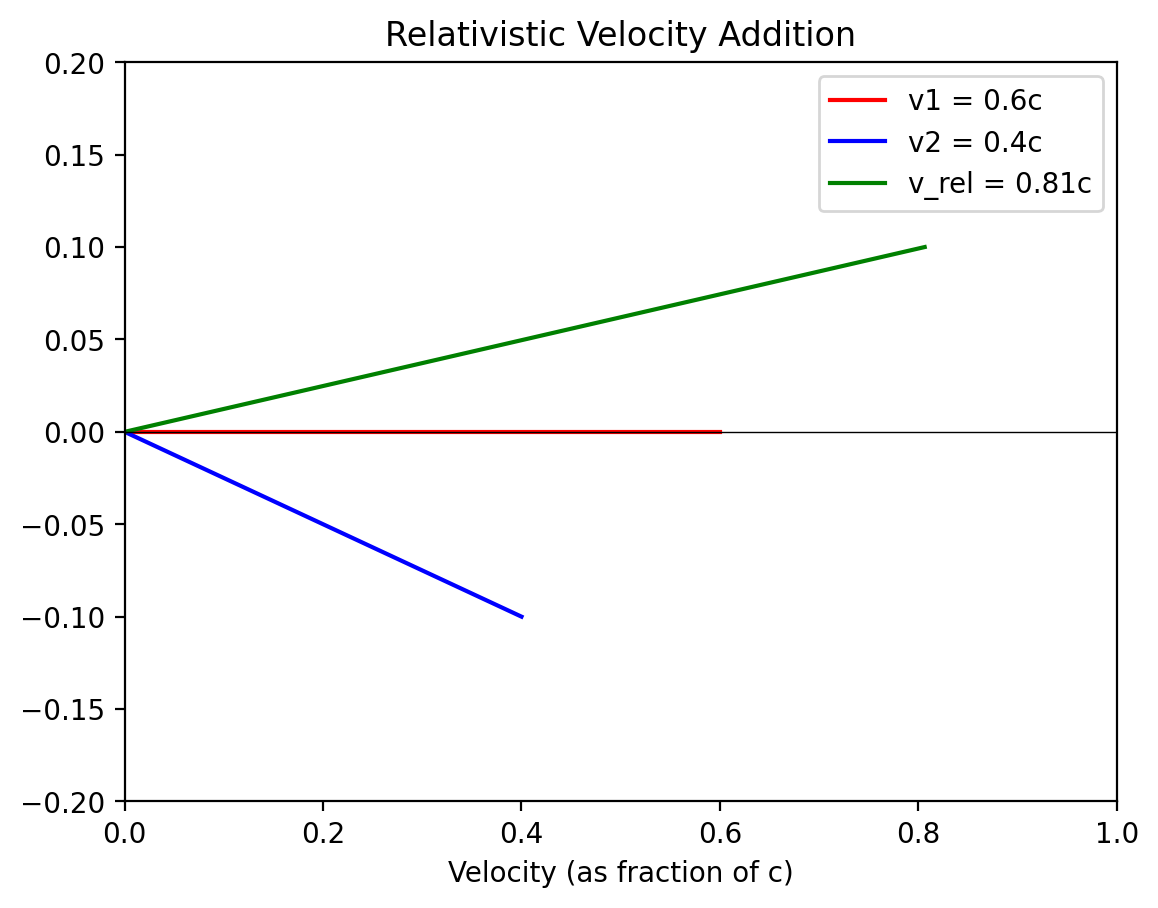

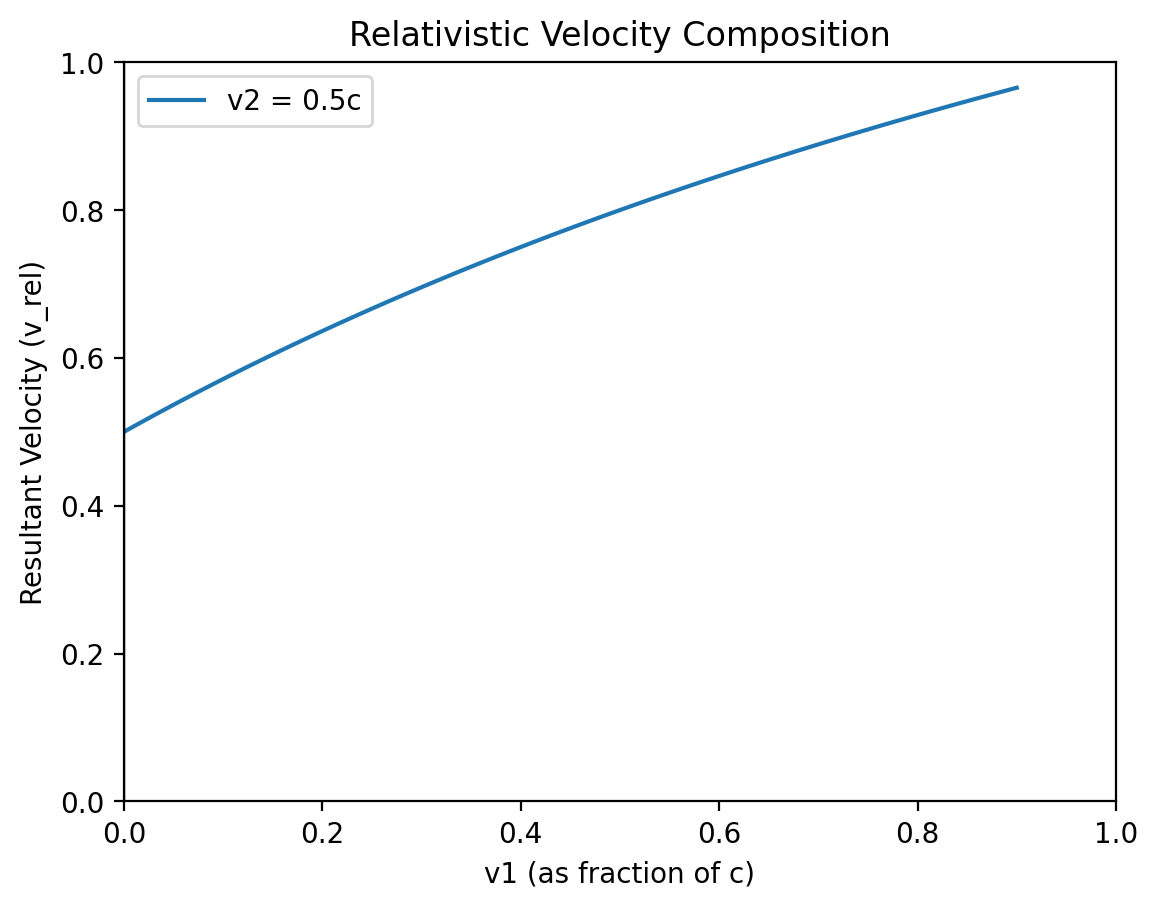

In [37]:
# Chapter 11: Velocity Addition in Special Relativity
import numpy as np
import matplotlib.pyplot as plt

# Velocity Addition Rule Visualization
def plot_velocity_addition():
    fig, ax = plt.subplots()

    # Define the velocities (fractions of the speed of light, c)
    v1 = 0.6  # First velocity
    v2 = 0.4  # Second velocity

    # Compute the relativistic sum of velocities
    v_rel = (v1 + v2) / (1 + v1 * v2)

    # Plot velocities on a number line
    ax.plot([0, v1], [0, 0], 'r-', label=f'v1 = {v1}c')
    ax.plot([0, v2], [0, -0.1], 'b-', label=f'v2 = {v2}c')
    ax.plot([0, v_rel], [0, 0.1], 'g-', label=f'v_rel = {v_rel:.2f}c')

    # Add labels and legend
    ax.axhline(0, color='black', linewidth=0.5)
    ax.set_xlim([0, 1])
    ax.set_ylim([-0.2, 0.2])
    ax.set_xlabel("Velocity (as fraction of c)")
    ax.set_ylabel("")
    ax.set_title("Relativistic Velocity Addition")
    ax.legend()
    plt.show()

plot_velocity_addition()

# Velocity Composition Visualization
def plot_velocity_composition():
    fig, ax = plt.subplots()

    # Range of v1 and v2 values
    v1 = np.linspace(0, 0.9, 100)
    v2 = 0.5  # Fixed second velocity

    # Compute relativistic addition for all v1 values
    v_rel = (v1 + v2) / (1 + v1 * v2)

    # Plot the relationship
    ax.plot(v1, v_rel, label=f'v2 = {v2}c')

    # Add labels and legend
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel("v1 (as fraction of c)")
    ax.set_ylabel("Resultant Velocity (v_rel)")
    ax.set_title("Relativistic Velocity Composition")
    ax.legend()
    plt.show()

plot_velocity_composition()


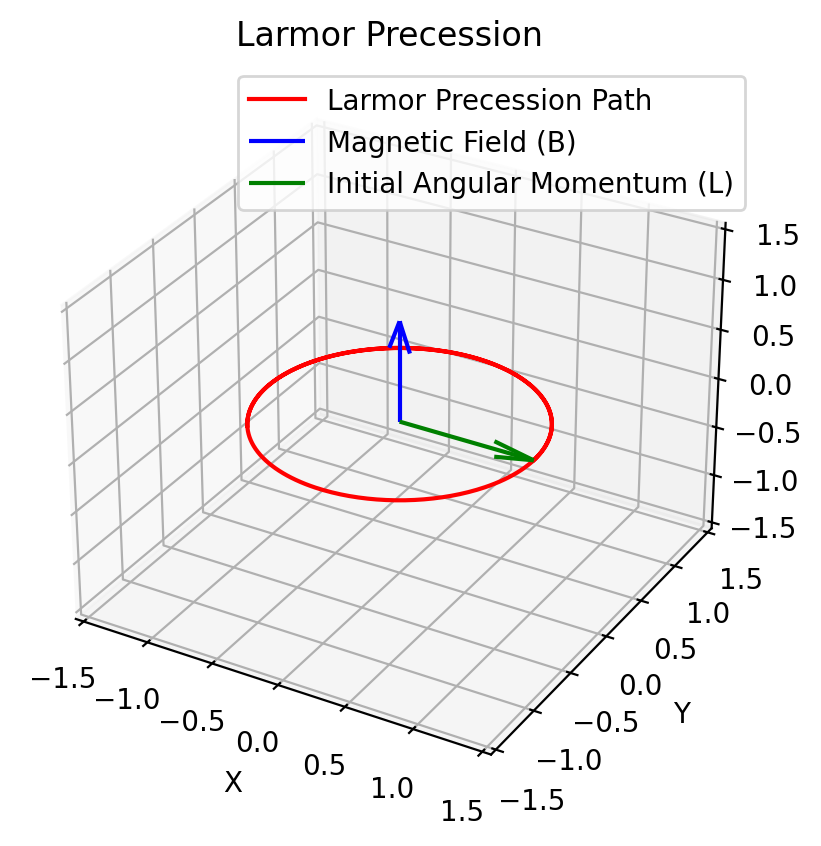

In [38]:
# Chapter 12: Larmor Precession in Geometric Algebra
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Larmor Precession Visualization
def plot_larmor_precession():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the magnetic field vector (B)
    B = np.array([0, 0, 1])  # Along z-axis

    # Initial angular momentum vector (L)
    L = np.array([1, 0, 0])  # Initially along x-axis

    # Precession angular frequency (omega = gamma * B)
    gamma = 1  # Gyromagnetic ratio (arbitrary units)
    omega = gamma * np.linalg.norm(B)

    # Time evolution
    t = np.linspace(0, 10, 500)

    # Precession path
    Lx = L[0] * np.cos(omega * t)
    Ly = L[0] * np.sin(omega * t)
    Lz = np.zeros_like(t)  # L remains in the x-y plane for uniform B

    # Plot precession
    ax.plot(Lx, Ly, Lz, label='Larmor Precession Path', color='r')

    # Plot magnetic field vector
    ax.quiver(0, 0, 0, B[0], B[1], B[2], color='b', label='Magnetic Field (B)')

    # Add initial angular momentum vector
    ax.quiver(0, 0, 0, L[0], L[1], L[2], color='g', label='Initial Angular Momentum (L)')

    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.set_title("Larmor Precession")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.show()

plot_larmor_precession()


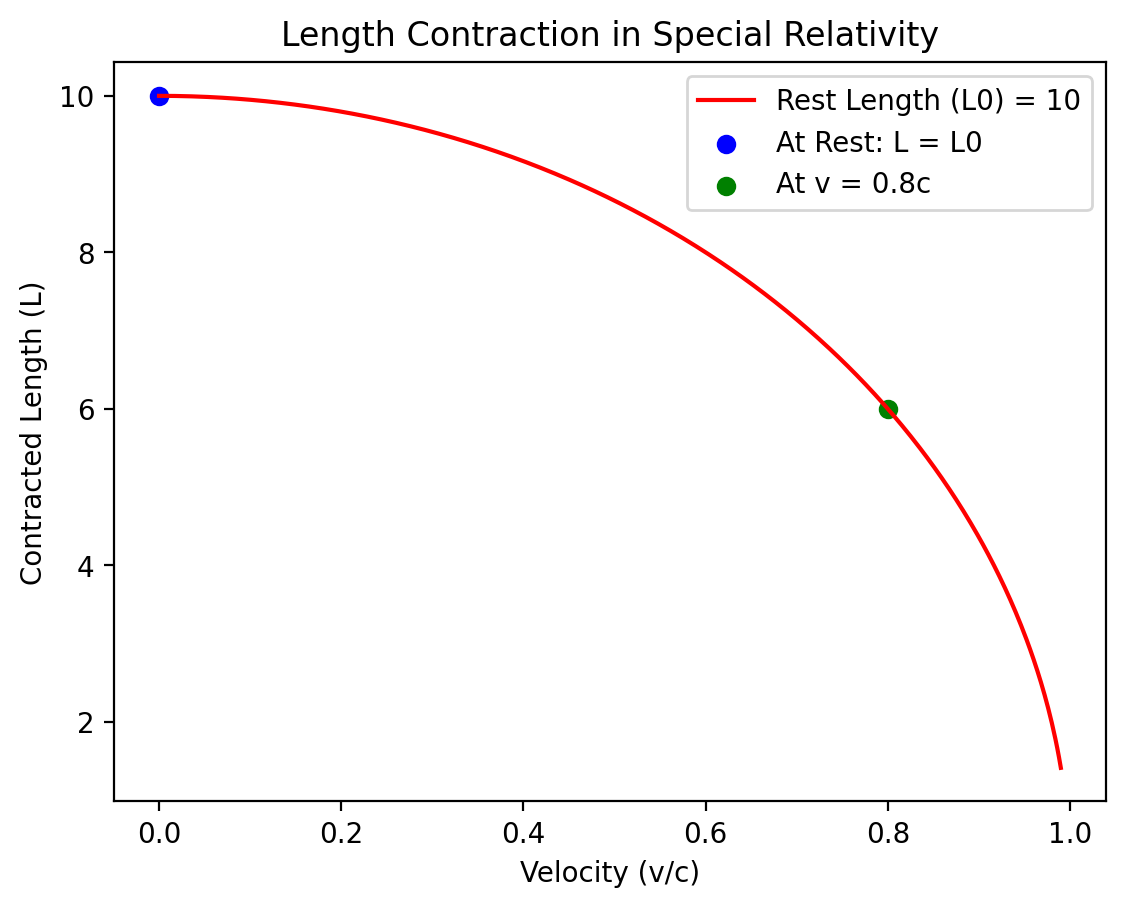

In [39]:
# Chapter 13: Length Contraction in Special Relativity
import numpy as np
import matplotlib.pyplot as plt

# Length Contraction Visualization
def plot_length_contraction():
    fig, ax = plt.subplots()

    # Define the rest length (L0)
    L0 = 10  # Rest length in arbitrary units

    # Define the range of velocities as fractions of the speed of light (c)
    v = np.linspace(0, 0.99, 500)  # Velocity values

    # Compute contracted length (L = L0 * sqrt(1 - v^2/c^2))
    c = 1  # Speed of light (normalized)
    L = L0 * np.sqrt(1 - (v/c)**2)

    # Plot the contraction
    ax.plot(v, L, color='r', label=f'Rest Length (L0) = {L0}')

    # Add labels and legend
    ax.set_xlabel("Velocity (v/c)")
    ax.set_ylabel("Contracted Length (L)")
    ax.set_title("Length Contraction in Special Relativity")
    ax.legend()

    # Highlight significant points
    ax.scatter([0], [L0], color='blue', label='At Rest: L = L0')
    ax.scatter([0.8], [L0 * np.sqrt(1 - 0.8**2)], color='green', label='At v = 0.8c')
    ax.legend()

    plt.show()

plot_length_contraction()


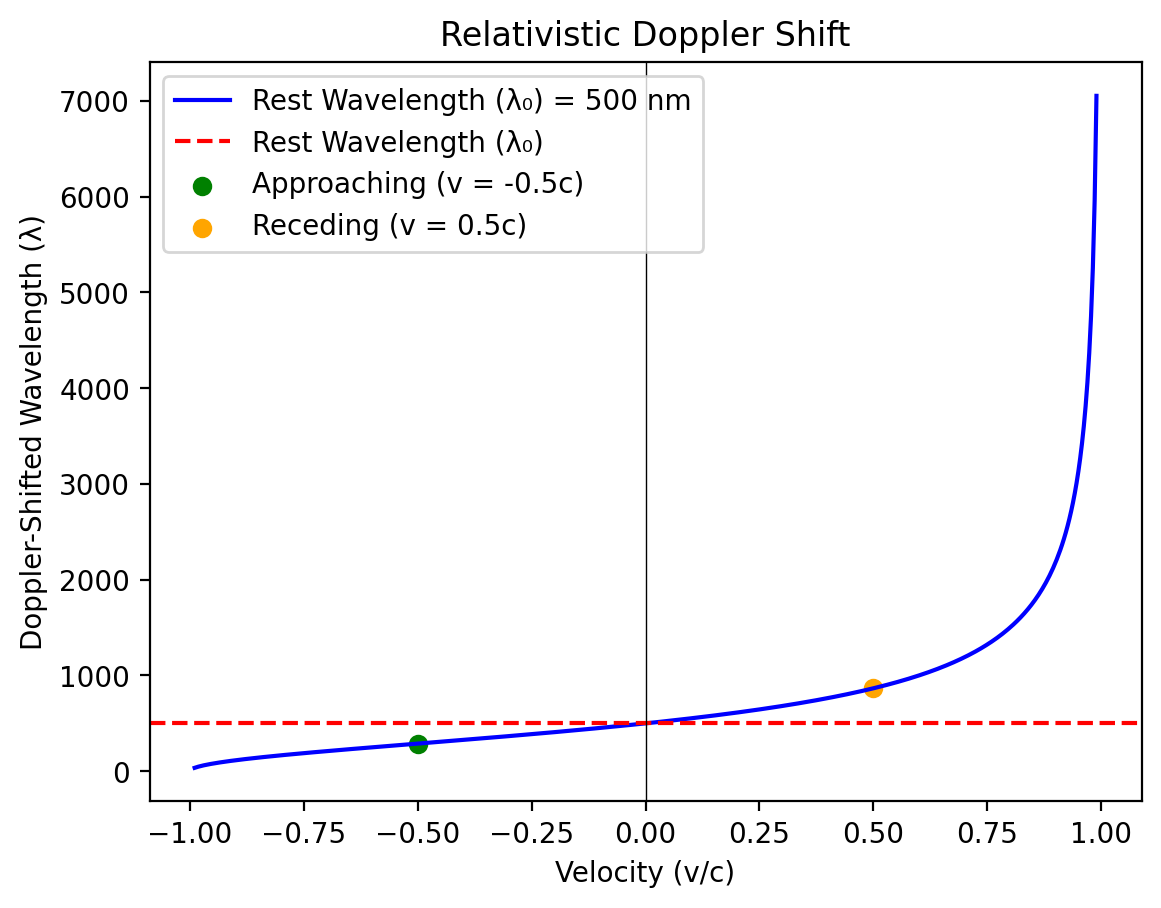

In [40]:
# Chapter 14: Doppler Shift in Special Relativity
import numpy as np
import matplotlib.pyplot as plt

# Doppler Shift Visualization
def plot_doppler_shift():
    fig, ax = plt.subplots()

    # Define the range of velocities (fractions of the speed of light, c)
    v = np.linspace(-0.99, 0.99, 500)  # Velocity values (negative for approaching, positive for receding)

    # Rest wavelength (lambda_0)
    lambda_0 = 500  # Example wavelength in nm

    # Doppler-shifted wavelength (lambda = lambda_0 * sqrt((1 + v/c) / (1 - v/c)))
    c = 1  # Speed of light (normalized)
    lambda_shifted = lambda_0 * np.sqrt((1 + v) / (1 - v))

    # Plot the Doppler shift
    ax.plot(v, lambda_shifted, color='b', label=f'Rest Wavelength (λ₀) = {lambda_0} nm')

    # Add labels and legend
    ax.axhline(lambda_0, color='red', linestyle='--', label='Rest Wavelength (λ₀)')
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlabel("Velocity (v/c)")
    ax.set_ylabel("Doppler-Shifted Wavelength (λ)")
    ax.set_title("Relativistic Doppler Shift")
    ax.legend()

    # Highlight significant points
    approaching = lambda_0 * np.sqrt((1 + -0.5) / (1 - -0.5))
    receding = lambda_0 * np.sqrt((1 + 0.5) / (1 - 0.5))
    ax.scatter([-0.5], [approaching], color='green', label='Approaching (v = -0.5c)')
    ax.scatter([0.5], [receding], color='orange', label='Receding (v = 0.5c)')
    ax.legend()

    plt.show()

plot_doppler_shift()


### The following is based on the appendix section of a Geometric Algebra paper: https://ieeexplore.ieee.org/document/6876131

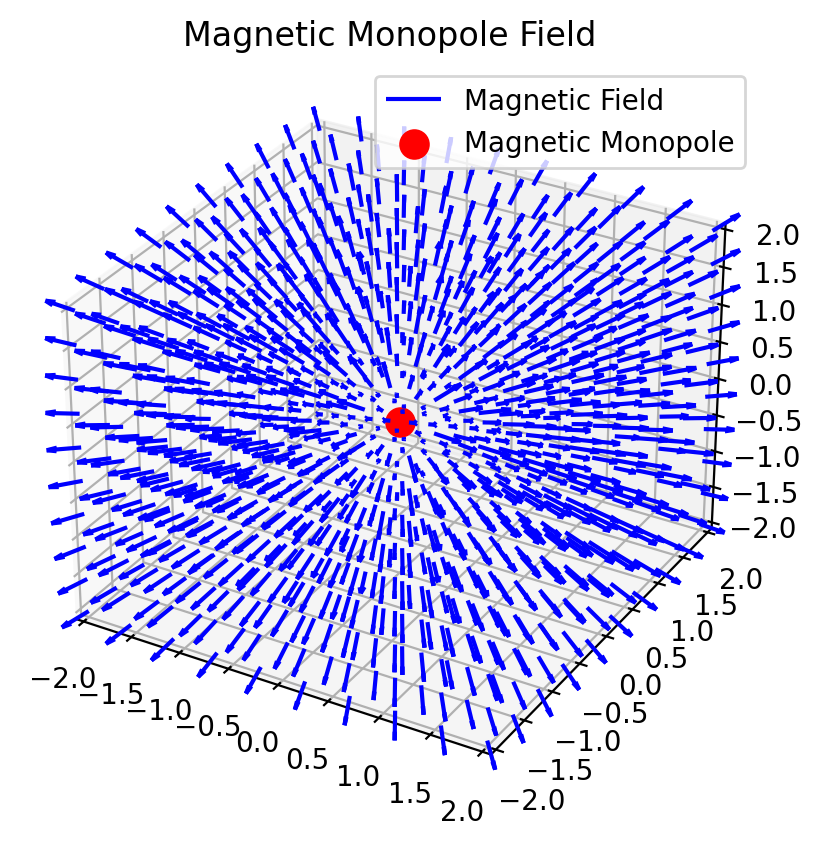

In [41]:
# Chapter 15: Magnetic Monopoles in Geometric Algebra
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Magnetic Monopole Field Visualization
def plot_magnetic_monopole():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the position of the monopole
    monopole_position = np.array([0, 0, 0])

    # Define a grid of points
    x = np.linspace(-2, 2, 10)
    y = np.linspace(-2, 2, 10)
    z = np.linspace(-2, 2, 10)
    X, Y, Z = np.meshgrid(x, y, z)

    # Compute the field vectors
    r = np.stack((X, Y, Z), axis=-1) - monopole_position  # Position vector from the monopole
    r_magnitude = np.linalg.norm(r, axis=-1, keepdims=True)
    B_field = r / r_magnitude**3  # Magnetic field (analogous to electric field for a charge)

    # Normalize the field for plotting
    B_field_normalized = B_field / np.linalg.norm(B_field, axis=-1, keepdims=True)

    # Plot the magnetic field vectors
    ax.quiver(X, Y, Z, B_field_normalized[..., 0], B_field_normalized[..., 1], B_field_normalized[..., 2], length=0.3, normalize=True, color='b', label='Magnetic Field')

    # Mark the position of the monopole
    ax.scatter(*monopole_position, color='r', s=100, label='Magnetic Monopole')

    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_title("Magnetic Monopole Field")
    ax.legend()
    plt.show()

plot_magnetic_monopole()


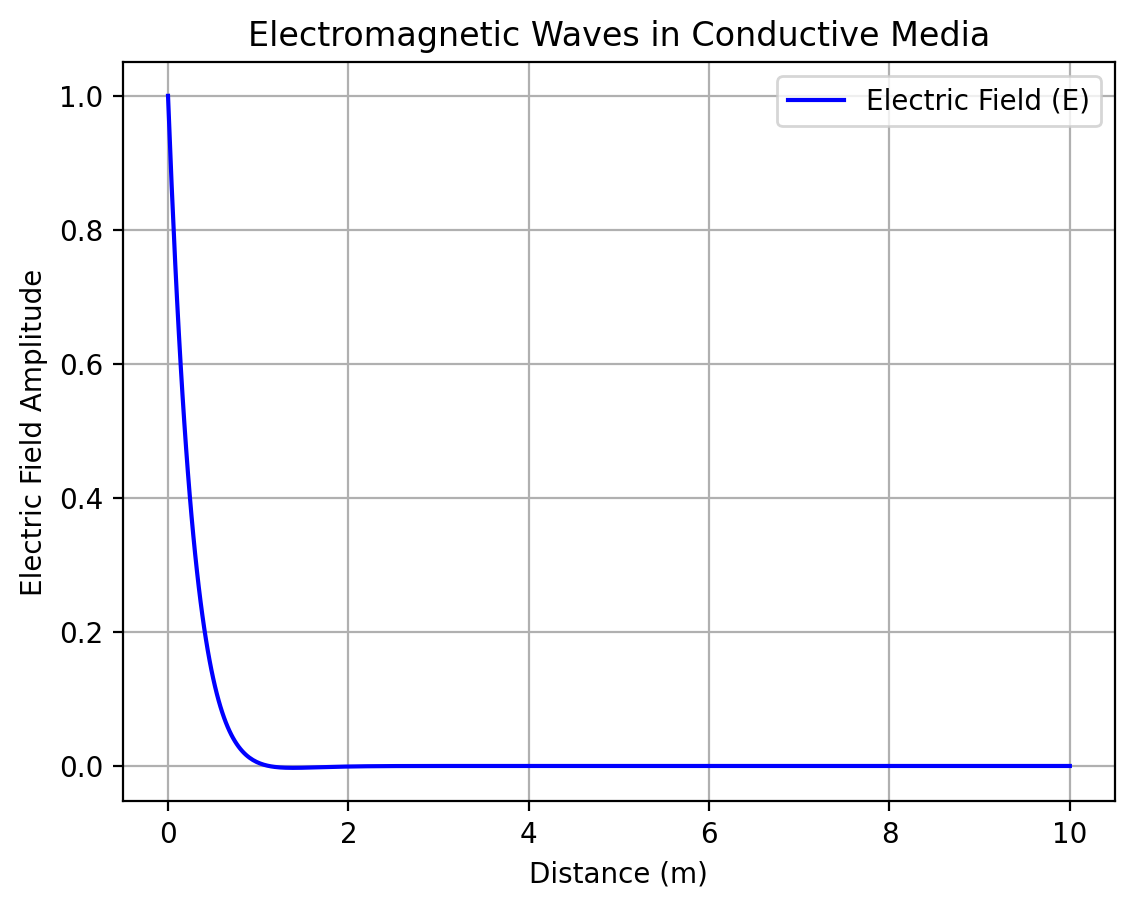

In [42]:
# Chapter 16: Electromagnetic Waves in Conductive Media
import numpy as np
import matplotlib.pyplot as plt

# Electromagnetic Waves in Conductive Media Visualization
def plot_em_waves_conductive_media():
    fig, ax = plt.subplots()

    # Define parameters for the wave
    sigma = 0.5  # Conductivity (S/m)
    epsilon = 8.854e-12  # Permittivity (F/m)
    mu = 4 * np.pi * 1e-7  # Permeability (H/m)
    omega = 2 * np.pi * 1e6  # Angular frequency (rad/s)

    # Attenuation constant and phase constant
    alpha = np.sqrt(np.pi * mu * sigma * omega)  # Attenuation constant
    beta = omega * np.sqrt(mu * epsilon / 2) * (1 + np.sqrt(1 + (sigma / (omega * epsilon))**2))**0.5  # Phase constant

    # Define space and time
    x = np.linspace(0, 10, 500)  # Spatial distance (m)
    t = 0  # Fixed time snapshot (s)

    # Electric field as a function of space and time
    E0 = 1  # Initial amplitude
    E_field = E0 * np.exp(-alpha * x) * np.cos(beta * x - omega * t)

    # Plot the wave
    ax.plot(x, E_field, color='b', label='Electric Field (E)')

    # Add labels and legend
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Electric Field Amplitude")
    ax.set_title("Electromagnetic Waves in Conductive Media")
    ax.legend()
    ax.grid(True)

    plt.show()

plot_em_waves_conductive_media()
